# Model 1 - Normalisasi dan Transliteration


## 1.1 Base Slang

In [261]:
!pip install wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud

df = pd.read_csv(
    "https://drive.google.com/uc?id=1xsO2dptvUWqyrbrKb-EffRBePhHbjko1",
    encoding="latin-1"
)

In [262]:
CORE_BASE_SLANG = [
    "ga", "gk", "gak", "gakkk", "gaks", "ngga", "nggak", "gaakan",
    "bgt", "bgd", "bngt", "mantap", "mantul",
    "oke", "ok", "wokei", "sip", "top",
    "bagus", "bgs", "jelek", "jlek", "jlk", "zonk",
    "biasa", "biasa aja", "b aja",
    "baik", "enak", "asik", "asyik",
    "luar biasa", "warbiasa",
    "cpt", "cepat", "cepet", "cepetan",
    "udh", "udah", "sdh",
    "blm", "belum", "sblm",
    "agak",
    "brg", "barang",
    "ongkir", "dr", "dri",
    "makasih", "mksh", "mksih", "tq", "thx", "trim", "trims",
    "terima kasih", "arigatou",
    "wkwk", "wkwkwk", "hehe", "hihi", "hehehe",
    "dgn", "dg",
    "thankyou", "thanks", "thank", "tks",
    "dsc", "desc", "dscrb", "dscrbs",
    "pic", "pict", "picture",
    # prefer gaul -> rekomen (user wants 'rekomen' as preferred)
    "recommend", "recommended", "recomended", "recomend", "rekomen", "rekomend",
    "fast", "response", "respon", "respone",
    "good", "nice", "best",
    "yg", "sy", "sya", "sm", "sma",
    "krn", "krena", "krna",
    "kasih", "kasi", "ngasi", "ngasih",
    "testi", "testimon", "testimoni",
    "n", "&",

    # varian 'suka'
    "suka", "sukak", "sukaa", "sukaaa", "sukaaaa",
    "sukakkk", "sukakk", "sukew", "sukeww", "sukiw",
    "sukaa~", "syukaaa", "succa", "succah",
    "suk", "skua", "skuaaa", "suaak", "sukq", "suk4",
    "sukaaa", "suka", "sukaaa",

    # tambahan varian request kamu
    "kuat", "kuatjuga", "kuat juga",
    "ramah", "lengkap",
    "gan", "sist",            # 'gan' biarkan saja; 'sist' counterpart
    "bagusksksnsnjsjjsksmmsms",  # literal varian yang kamu kirim
    "dterima", "diterima",
    "keren", "keren juga",

    # tambahan kata/varian internasional dan typo yg diminta
    "danke", "gracias", "kittos", "syukron",
    "mantab", "pebaiki", "awet", "kwalitas", "kualitas"
]

# deduplicate & sort
CORE_BASE_SLANG = sorted(set(CORE_BASE_SLANG))

TARGET_NORMAL = {
    "ga": "tidak",
    "gk": "tidak",
    "gak": "tidak",
    "gakkk": "tidak",
    "gaks": "tidak",
    "ngga": "tidak",
    "kagak": "tidak",
    "nggak": "tidak",
    "gaakan": "tidak akan",

    "bgt": "banget",
    "bgd": "banget",
    "bngt": "banget",
    "mantap": "mantap",
    "mantul": "mantap",

    "oke": "oke",
    "ok": "oke",
    "wokei": "oke",
    "sip": "sip",
    "top": "bagus",

    "bagus": "bagus",
    "bgs": "bagus",
    "jelek": "jelek",
    "jlek": "jelek",
    "jlk": "jelek",
    "zonk": "zonk",
    "biasa": "biasa",
    "b aja": "biasa aja",
    "biasa aja": "biasa aja",
    "baik": "baik",
    "enak": "enak",
    "asik": "asyik",
    "asyik": "asyik",

    "luar biasa": "luar biasa",
    "warbiasa": "luar biasa",

    "cpt": "cepat",
    "cepat": "cepat",
    "cepet": "cepat",
    "cepetan": "cepat",
    "udh": "sudah",
    "udah": "sudah",
    "sdh": "sudah",
    "blm": "belum",
    "belum": "belum",
    "sblm": "sebelum",
    "agak": "sedikit",

    "brg": "barang",
    "barang": "barang",
    "ongkir": "ongkos kirim",
    "dr": "dari",
    "dri": "dari",

    "dgn": "dengan",
    "dg": "dengan",
    "dengn": "dengan",
    "denggan": "dengan",
    "dngan": "dengan",
    "tp": "tapi",
    "tpi": "tapi",
    "n": "dan",
    "&": "dan",

    "makasih": "terima kasih",
    "mksh": "terima kasih",
    "mksih": "terima kasih",
    "tq": "terima kasih",
    "thx": "terima kasih",
    "trim": "terima kasih",
    "trims": "terima kasih",
    "terima kasih": "terima kasih",
    "arigatou": "terima kasih",
    "arogatou": "terima kasih",
    "thankyou": "terima kasih",
    "thankyouu": "terima kasih",
    "thankyouuu": "terima kasih",
    "thanks": "terima kasih",
    "thank": "terima kasih",
    "tks": "terima kasih",

    "kasih": "kasih",
    "kasi": "kasih",
    "ngasi": "kasih",
    "ngasih": "kasih",

    "wkwk": "haha",
    "wkwkwk": "haha",
    "hehe": "haha",
    "hehehe": "haha",
    "hihi": "haha",

    "dsc": "deskripsi",
    "desc": "deskripsi",
    "dscrb": "deskripsi",
    "dscrbs": "deskripsi",
    "descr": "deskripsi",

    "pic": "gambar",
    "pict": "gambar",
    "picture": "gambar",

    # prefer 'rekomen' as gaul target
    "recommend": "rekomen",
    "recommended": "rekomen",
    "recomended": "rekomen",
    "recomend": "rekomen",
    "rekomen": "rekomen",
    "rekomend": "rekomen",

    "fast": "cepat",
    "response": "respon",
    "respon": "respon",
    "respone": "respon",

    "good": "bagus",
    "nice": "bagus",
    "best": "terbaik",

    "yg": "yang",
    "sy": "saya",
    "sya": "saya",
    "sm": "sama",
    "sma": "sama",
    "krn": "karena",
    "krena": "karena",
    "krna": "karena",

    "testi": "testimoni",
    "testimon": "testimoni",
    "testimoni": "testimoni",

    # normalisasi varian 'suka'
    "suka": "suka",
    "sukak": "suka",
    "sukaa": "suka",
    "sukaaa": "suka",
    "sukaaaa": "suka",
    "sukakkk": "suka",
    "sukakk": "suka",
    "sukew": "suka",
    "sukeww": "suka",
    "sukiw": "suka",
    "sukaa~": "suka",
    "syukaaa": "suka",
    "succa": "suka",
    "succah": "suka",
    "suk": "suka",
    "skua": "suka",
    "skuaaa": "suka",
    "suaak": "suka",
    "sukq": "suka",
    "suk4": "suka",
    "sukaaa": "suka",
    "suka": "suka",
    "sukaaa": "suka",

    # tambahan dari inputmu
    "kuat": "kuat",
    "kuat juga": "kuat",
    "kuatjuga": "kuat",
    "ramah": "ramah",
    "lengkap": "lengkap",
    "gan": "gan",            # biarkan sebagai istilah sapaan
    "sister": "sist",          # counterpart 'gan'
    "bagusksksnsnjsjjsksmmsms": "bagus",
    "dterima": "diterima",
    "diterima": "diterima",
    "keren": "keren",
    "keren juga": "keren",

    # tambahan baru (multibahasa / typo) -- mapping ke terimakasih / mantap / perbaiki / kualitas, dll
    "danke": "terimakasih",
    "gracias": "terimakasih",
    "kittos": "terimakasih",
    "syukron": "terimakasih",
    "mantab": "mantap",
    "pebaiki": "perbaiki",
    "awet": "awet",
    "kwalitas": "kualitas",
    "kualitas": "kualitas"
}

# hitung jumlah kata unik (raw) dari CORE_BASE_SLANG + keys TARGET_NORMAL
unique_words_raw = set(CORE_BASE_SLANG) | set(TARGET_NORMAL.keys())

print("Jumlah CORE_BASE_SLANG :", len(CORE_BASE_SLANG))
print("Jumlah TARGET_NORMAL   :", len(TARGET_NORMAL))
print("Jumlah kata unik (raw) :", len(unique_words_raw))


Jumlah CORE_BASE_SLANG : 147
Jumlah TARGET_NORMAL   : 157
Jumlah kata unik (raw) : 158


In [263]:
ADDITIONAL_TARGET_NORMAL_A = {
    # --- ekspresi/emotikon / tertawa / seruan ---
    "aahh": "ah",
    "ahaai": "haha",
    "ahahah": "haha",
    "ahahaha": "haha",
    "ahahahah": "haha",
    "ahayy": "haha",
    "ahem": "ehm",
    "ahh": "ah",

    # --- 'abal' dan turunannya ---
    "abal": "abal",
    "abal2": "abal",
    "abalterimakasih": "abal",

    # --- 'abis' / 'habis' ---
    "abis": "habis",
    "abiss": "habis",
    "abisszz": "habis",
    "abizz": "habis",
    "abiiss": "habis",

    # --- abu / warna ---
    "abu2": "abu",
    "abux": "abu",

    # --- singkatan bahasa Inggris umum ---
    "about": "tentang",
    "absolutely": "banget",
    "according": "menurut",
    "active": "aktif",
    "activities": "aktivitas",
    "affordable": "terjangkau",
    "after": "setelah",
    "afterall": "bagaimanapun",
    "again": "lagi",
    "app": "aplikasi",
    "apps": "aplikasi",
    "apply": "gunakan",
    "awesome": "keren",

    # --- typo ke bahasa Indonesia / domain e-commerce ---
    "accesories": "aksesoris",
    "access": "akses",
    "acc": "setuju",
    "advertised": "sesuai iklan",
    "arrival": "kedatangan",
    "arrived": "sampai",

    # --- bentuk syukur / doa: 'amin' & 'alhamdulillah' ---
    "aamiin": "amin",
    "aamiinn": "amin",
    "aamin": "amin",
    "amiin": "amin",
    "amiinn": "amin",
    "aminn": "amin",

    "alhamdhulillah": "alhamdulillah",
    "alhamduillah": "alhamdulillah",
    "alhamduliah": "alhamdulillah",
    "alhamdulialh": "alhamdulillah",
    "alhamdulilah": "alhamdulillah",
    "alhamdulilahh": "alhamdulillah",
    "alhamduliliiah": "alhamdulillah",
    "alhamdulillaah": "alhamdulillah",
    "alhamdulillah": "alhamdulillah",
    "alhamdulillh": "alhamdulillah",
    "alhamdullah": "alhamdulillah",
    "alhamdullilah": "alhamdulillah",
    "alhamdullillah": "alhamdulillah",
    "alhamfulilah": "alhamdulillah",
    "allhamdulilah": "alhamdulillah",
    "allhamdulilillah": "alhamdulillah",
    "allhamdulillah": "alhamdulillah",
    "alhmdlh": "alhamdulillah",
    "alhmdllh": "alhamdulillah",
    "alhmdulilah": "alhamdulillah",
    "alhmdulillah": "alhamdulillah",

    # --- 'aman' / 'adem' / intensifier kecil ---
    "aman2": "aman",
    "amanlah": "aman",
    "amann": "aman",
    "ademm": "adem",

    # --- admin / abang ---
    "admiinn": "admin",
    "admin": "admin",
    "adminnya": "admin",
    "abangnya": "abang",

    # --- singkatan kecil yang jelas ---
    "ad": "iklan",
    "aga": "agak",
    "agaan": "agak",
    "agag": "agak",
    "agr": "agar",

    # --- ampun / emosi ---
    "ampun": "ampun",
    "ampuun": "ampun",

    # --- 'antar' dan variasi ---
    "antar": "antar",
    "anter": "antar",

    # --- 'aneh', 'asik', 'asyik', dll ---
    "anehh": "aneh",
    "asikk": "asyik",
    "asiikk": "asyik",

    # --- doa lain ---
    "amien": "amin",

    # --- random noise yang bisa dibuang ---
    "abcdefghijklmnopqrstuvwxyz1234567890": "",

    # --- ejaan asing yang sering muncul ---
    "authentic": "asli",
    "auto": "otomatis",
}

# =====================================================================
# Tambahan normalisasi untuk 'B'
# =====================================================================
ADDITIONAL_TARGET_NORMAL_B = {
    # === CLUSTER "BAGUS" ===
    "baagguuss": "bagus",
    "baaguss": "bagus",
    "baaguuiiss": "bagus",
    "bafus": "bagus",
    "bagoess": "bagus",
    "bagoos": "bagus",
    "bagooss": "bagus",
    "bagos": "bagus",
    "bagoss": "bagus",
    "bags": "bagus",
    "bagsusvsjsbsjdhisbsisbzjzhhxuzjzbxbhxhxjxjxjxjxjxjxjxjxjf": "bagus",
    "bagt": "bagus",
    "bagu": "bagus",
    "bagua": "bagus",
    "baguan": "bagus",
    "bagud": "bagus",
    "bagus2": "bagus",
    "bagusan": "bagus",
    "bagusbanget": "bagus banget",
    "bagusbtas": "bagus banget",
    "bagusd": "bagus",
    "bagusdan": "bagus",
    "baguslah": "bagus",
    "baguslahh": "bagus",
    "bagusndangm": "bagus",
    "bagusnya": "bagus",
    "bagusnyaa": "bagus",
    "baguss": "bagus",
    "bagussaryadi": "bagus",
    "bagussdd": "bagus",
    "bagussdss": "bagus",
    "bagussesuai": "bagus sesuai",
    "bagussmantull": "bagus mantap",
    "bagussz": "bagus",
    "bagusâ": "bagus",
    "bagusã": "bagus",
    "bagusð": "bagus",
    "baguu": "bagus",
    "baguus": "bagus",
    "baguuss": "bagus",
    "baguussa": "bagus",
    "baguussaa": "bagus",
    "baguussass": "bagus",
    "baguussdsd": "bagus",
    "baguz": "bagus",
    "baguã": "bagus",
    "bagys": "bagus",
    "baugus": "bagus",

    # === CLUSTER "BAIK" ===
    "baiik": "baik",
    "baiikk": "baik",
    "baikk": "baik",
    "baik2": "baik",
    "baikdan": "baik",
    "baiklah": "baik",
    "baikm": "baik",
    "baiknya": "baik",
    "baikð": "baik",

    # === CLUSTER "BANYAK" ===
    "banyaak": "banyak",
    "banyaakk": "banyak",
    "banyaaklkk": "banyak",
    "banyak2": "banyak",
    "banyakan": "banyak",
    "banyakin": "banyak",
    "banyakk": "banyak",
    "banyaknya": "banyak",
    "banyk": "banyak",
    "banykk": "banyak",
    "bnyak": "banyak",
    "bnyakk": "banyak",
    "bnyaknya": "banyak",
    "bnyk": "banyak",
    "bnyal": "banyak",
    "buanyak": "banyak",

    # === CLUSTER "BANGET" ===
    "bangat": "banget",
    "bangatt": "banget",
    "banged": "banget",
    "bangeedd": "banget",
    "bangeet": "banget",
    "bangeett": "banget",
    "bangeettr": "banget",
    "bangen": "banget",
    "bangetlah": "banget",
    "bangets": "banget",
    "bangetss": "banget",
    "bangett": "banget",
    "bangetts": "banget",
    "bangettss": "banget",
    "bangettz": "banget",
    "bangettð": "banget",
    "bangetð": "banget",
    "bangeut": "banget",
    "bngat": "banget",
    "bnget": "banget",
    "bngett": "banget",
    "bngit": "banget",
    "bngtt": "banget",
    "bngttf": "banget",
    "bangeeet": "banget",
    "bangeett": "banget",
    "bangeeettr": "banget",

    # === CLUSTER "BARANG" ===
    "baaraanngg": "barang",
    "baarang": "barang",
    "baarangny": "barang",
    "baarng": "barang",
    "baraang": "barang",
    "baraanngg": "barang",
    "barabg": "barang",
    "barag": "barang",
    "baragn": "barang",
    "baragnya": "barang",
    "baramg": "barang",
    "baramgnya": "barang",
    "baran": "barang",
    "baranb": "barang",
    "baranf": "barang",
    "barang2": "barang",
    "barang2nya": "barang",
    "baranga": "barang",
    "baranganya": "barang",
    "barangbga": "barang",
    "barangbsdh": "barang",
    "barangbsudah": "barang",
    "barangbudah": "barang",
    "barangcocok": "barang",
    "barange": "barang",
    "barangg": "barang",
    "barangmlnya": "barang",
    "barangmya": "barang",
    "barangn": "barang",
    "barangna": "barang",
    "barangnga": "barang",
    "barangnnya": "barang",
    "barangny": "barang",
    "barangnya": "barang",
    "barangnyaa": "barang",
    "barangnyað": "barang",
    "barangnys": "barang",
    "barangnyw": "barang",
    "barangpun": "barang",
    "barangsampah": "barang sampah",
    "barangsesuai": "barang sesuai",
    "barangsudah": "barang sudah",
    "barangsudahditerima": "barang sudah diterima",
    "barangvsdh": "barang sudah",
    "barangx": "barang",
    "barangxa": "barang",
    "barangy": "barang",
    "barangya": "barang",
    "barangyaa": "barang",
    "barangð": "barang",
    "baranh": "barang",
    "barannya": "barang",
    "barano": "barang",
    "barans": "barang",
    "baranv": "barang",
    "baranya": "barang",
    "bararang": "barang",
    "barsng": "barang",

    # === CLUSTER "BATERAI" ===
    "bateerai": "baterai",
    "baterai": "baterai",
    "baterainya": "baterai",
    "baterainyað": "baterai",
    "batere": "baterai",
    "baterei": "baterai",
    "baterenya": "baterai",
    "batery": "baterai",
    "batrai": "baterai",
    "batrainya": "baterai",
    "batre": "baterai",
    "batrei": "baterai",
    "batreinya": "baterai",
    "batrenya": "baterai",
    "batrex": "baterai",
    "batrey": "baterai",
    "batreynya": "baterai",
    "batt": "baterai",
    "batterai": "baterai",
    "batterainya": "baterai",
    "batteray": "baterai",
    "battere": "baterai",
    "batterenya": "baterai",
    "battery": "baterai",
    "batterynya": "baterai",

    # === CLUSTER "BERFUNGSI" ===
    "berffungsi": "berfungsi",
    "berfingsi": "berfungsi",
    "berfngsi": "berfungsi",
    "berfugsi": "berfungsi",
    "berfungai": "berfungsi",
    "berfungi": "berfungsi",
    "berfungsii": "berfungsi",
    "berfungsing": "berfungsi",
    "berfungsið": "berfungsi",
    "berfungsu": "berfungsi",
    "berfunsi": "berfungsi",
    "bfungsi": "berfungsi",
    "brfungsi": "berfungsi",

    # === CLUSTER "BERKUALITAS" ===
    "berkialitas": "berkualitas",
    "berkualiras": "berkualitas",
    "berkualita": "berkualitas",
    "berkualitad": "berkualitas",
    "berkualitaslah": "berkualitas",
    "berkualitasð": "berkualitas",
    "berkulitas": "berkualitas",
    "berkuslitas": "berkualitas",
    "berkwalitas": "berkualitas",
    "qualitasnya": "kualitasnya",

    # === CLUSTER "BELUM" ===
    "bbelum": "belum",
    "belom": "belum",
    "belu": "belum",

    # === CLUSTER "BENER / BENAR" ===
    "beneer": "bener",
    "bener": "bener",
    "bener2": "bener",
    "benerab": "bener",
    "beneran": "bener",
    "benerr": "bener",
    "bner": "bener",
    "bner2": "bener",
    "bneran": "bener",
    "bnerâ": "bener",
    "benar2": "benar",

    # === CLUSTER "BENTAR" ===
    "bentar": "sebentar",
    "bentaran": "sebentar",

    # === CLUSTER "BUBBLEWRAP" ===
    "bubblewarp": "bubblewrap",
    "bubblewrap": "bubblewrap",
    "bubblewrapnya": "bubblewrap",
    "bubblenya": "bubblewrap",
    "bublewarp": "bubblewrap",
    "bublewarpnya": "bubblewrap",
    "bublewrap": "bubblewrap",
    "buble": "bubblewrap",
    "bublenya": "bubblewrap",
    "bubble": "bubblewrap",

    # === CLUSTER "BOS" / "BOSKU" ===
    "bosku": "bos",
    "boskuu": "bos",
    "boskuh": "bos",
    "bosq": "bos",
    "bosqq": "bos",
    "bosqu": "bos",
    "bosque": "bos",
    "bosquee": "bos",
    "bosqueð": "bos",
    "bosquue": "bos",
    "bosquuee": "bos",
    "bossku": "bos",
    "bosskuu": "bos",
    "bosskyuu": "bos",
    "bossque": "bos",
    "booss": "bos",
    "boossa": "bos",
    "boossku": "bos",
    "boossquuee": "bos",

    # === CLUSTER "BANYAK / BERAPA" SINGKATAN ===
    "bbrp": "beberapa",
    "bbrpa": "beberapa",

    # === CLUSTER "BEGITU / BAGAIMANA" SINGKATAN ===
    "bgmn": "bagaimana",
    "bgitu": "begitu",
    "bgtu": "begitu",

    # === CLUSTER "BAHASA / BAHWA" SINGKATAN ===
    "bhs": "bahasa",
    "bhw": "bahwa",

    # === CLUSTER "BUKAN" SINGKATAN ===
    "bkn": "bukan",

    # === CLUSTER LAIN-LAIN KECIL ===
    "backlight": "backlight",
    "backlit": "backlight",
    "backup": "cadangan",
    "bad": "buruk",
    "bebasongkir": "bebas ongkir",
    "bca": "bca",
    "bismillah": "bismillah",
    "budgett": "budget",
    "bugdet": "budget",
    "bukankalengkaleng": "bukan kaleng kaleng",
    "buruan": "cepat",
    "buruaan": "cepat",
}

# =====================================================================
# Merge semua kamus
# =====================================================================
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_A)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_B)

# deduplicate & sort slang base, sekalian tambah semua key yang punya mapping
CORE_BASE_SLANG = sorted(set(CORE_BASE_SLANG) | set(TARGET_NORMAL.keys()))

# hitung jumlah kata unik (raw) dari CORE_BASE_SLANG + keys TARGET_NORMAL
unique_words_raw = set(CORE_BASE_SLANG) | set(TARGET_NORMAL.keys())

print("Jumlah CORE_BASE_SLANG :", len(CORE_BASE_SLANG))
print("Jumlah TARGET_NORMAL   :", len(TARGET_NORMAL))
print("Jumlah kata unik (raw) :", len(unique_words_raw))

Jumlah CORE_BASE_SLANG : 516
Jumlah TARGET_NORMAL   : 515
Jumlah kata unik (raw) : 516


In [264]:
ADDITIONAL_TARGET_NORMAL_C = {
    # --- CLUSTER CACAT ---
    "cacad": "cacat",
    "cacan": "cacat",
    "cacat": "cacat",
    "cacatnya": "cacat",
    "cacatð": "cacat",

    # --- CADANGAN ---
    "cadangan": "cadangan",
    "cadanganya": "cadangan",

    # --- KABEL ---
    "cable": "kabel",

    # --- CLUSTER CAKEP ---
    "cakep": "cakep",
    "cakebb": "cakep",
    "cakeep": "cakep",
    "cakeephh": "cakep",
    "cakeepp": "cakep",
    "cakepp": "cakep",
    "cakeppoo": "cakep",
    "cakeppssppll": "cakep",
    "cakkeepp": "cakep",
    "cakeup": "cakep",

    # --- CLUSTER CANCEL ---
    "cancel": "cancel",
    "cancle": "cancel",
    "cansel": "cancel",

    # --- CLUSTER CANTIK ---
    "cantik": "cantik",
    "cantiik": "cantik",
    "cantiikk": "cantik",
    "cantikk": "cantik",
    "cantkk": "cantik",
    "cntik": "cantik",

    # --- CLUSTER CAPEK ---
    "cape": "capek",
    "capede": "capek",
    "capek": "capek",
    "capek2": "capek",
    "capet": "capek",

    # --- CAPACITY / KAPASITAS ---
    "capacity": "kapasitas",

    # --- CLUSTER CEPAT (super lengkap) ---
    "ccepat": "cepat",
    "cepa": "cepat",
    "cepaar": "cepat",
    "cepaat": "cepat",
    "cepaatt": "cepat",
    "cepaatty": "cepat",
    "cepaatð": "cepat",
    "cepag": "cepat",
    "cepan": "cepat",
    "cepar": "cepat",
    "cepatgood": "cepat",
    "cepatk": "cepat",
    "cepatnya": "cepat",
    "cepatsampai": "cepat",
    "cepatt": "cepat",
    "cepattrtr": "cepat",
    "cepatâ": "cepat",
    "cepatð": "cepat",
    "cepay": "cepat",
    "cepaã": "cepat",
    "cepean": "cepat",
    "ceped": "cepat",
    "cepeet": "cepat",
    "cepeett": "cepat",
    "ceper": "cepat",
    "cepet2": "cepat",
    "cepetin": "cepat",
    "cepetnya": "cepat",
    "cepett": "cepat",
    "cepetð": "cepat",
    "cepeå": "cepat",
    "cepqt": "cepat",
    "cepst": "cepat",
    "cept": "cepat",
    "cpat": "cepat",
    "cpatt": "cepat",
    "cpatð": "cepat",
    "cpeat": "cepat",
    "cpet": "cepat",
    "cpett": "cepat",
    "cpt": "cepat",
    "cptt": "cepat",
    "cptz": "cepat",
    "cwepet": "cepat",
    "cweptt": "cepat",
    "cwpat": "cepat",

    # --- CEK / CHECKOUT ---
    "cek": "cek",
    "cekout": "checkout",
    "checkout": "checkout",
    "check": "cek",

    # --- CEMILAN ---
    "cemilan": "camilan",

    # --- CLUSTER CHARGER / CAS ---
    "carger": "charger",
    "cargernya": "charger",
    "charger": "charger",
    "chargeran": "charger",
    "chargernya": "charger",
    "charging": "charger",
    "chargingnya": "charger",

    "cas": "cas",
    "casan": "cas",
    "casannya": "cas",
    "casanya": "cas",

    # --- CLUSTER CASING ---
    "casing": "casing",
    "casingnya": "casing",
    "cassing": "casing",

    # --- CASHBACK ---
    "cashback": "cashback",
    "cashbacknya": "cashback",

    # --- CLUSTER CARTRIDGE ---
    "cadridge": "cartridge",
    "cartridge": "cartridge",
    "catridge": "cartridge",
    "catridgenya": "cartridge",
    "catridges": "cartridge",
    "carteidge": "cartridge",
    "carteridge": "cartridge",
    "catridhe": "cartridge",
    "catrigde": "cartridge",

    # --- CLUSTER CHAT ---
    "chat": "chat",
    "chatnya": "chat",
    "chatpun": "chat",
    "chatting": "chat",

    # --- CHEAP ---
    "cheap": "murah",
    "cheapest": "murah",

    # --- CLUSTER COCOK ---
    "cocok": "cocok",
    "cocokk": "cocok",
    "cocoknya": "cocok",
    "cocookk": "cocok",
    "ccocok": "cocok",
    "ccok": "cocok",
    "concok": "cocok",
    "coxok": "cocok",
    "cuccok": "cocok",
    "cuco": "cocok",
    "cucok": "cocok",
    "cucokk": "cocok",
    "cucook": "cocok",
    "cucookk": "cocok",

    # --- CLUSTER COLOK ---
    "colok": "colok",
    "colok2": "colok",
    "colokan": "colok",
    "colokannya": "colok",
    "colokanya": "colok",
    "colokin": "colok",
    "colokkan": "colok",
    "coloknya": "colok",

    # --- COLLECTION / KOLEKSI ---
    "colection": "koleksi",
    "collect": "koleksi",
    "collections": "koleksi",

    # --- COMENDED -> REKOMEN ---
    "comended": "rekomen",

    # --- COMPLAIN / KOMPLAIN ---
    "complain": "komplain",
    "complainless": "komplain",
    "complaint": "komplain",

    # --- CONDITION / KONDISI ---
    "condisi": "kondisi",
    "condition": "kondisi",

    # --- CONNECT / CONNECTOR ---
    "conect": "connect",
    "conek": "connect",
    "connect": "connect",
    "connector": "konektor",
    "connectornya": "konektor",

    # --- COOL / KEREN ---
    "cool": "keren",
    "coollookk": "keren",

    # --- COPAS / COPY ---
    "copas": "copy",
    "copy": "copy",

    # --- CLUSTER CUSTOMER ---
    "costomer": "customer",
    "costum": "customer",
    "costumer": "customer",
    "cust": "customer",
    "custom": "custom",
    "customable": "custom",
    "customer": "customer",
    "customernya": "customer",
    "customers": "customer",
    "custumer": "customer",
    "custumernya": "customer",
    "castaumer": "customer",
    "cutomer": "customer",

    # --- CUKUP ---
    "cukuo": "cukup",
    "cukup": "cukup",
    "cukuplah": "cukup",
    "cukupp": "cukup",
    "cukuupp": "cukup",

    # --- CUMA ---
    "cuma": "cuma",
    "cumaan": "cuma",
    "cuman": "cuma",
    "cumn": "cuma",

    # --- CUALITY -> KUALITAS ---
    "cuality": "kualitas",

    # --- CUTE ---
    "cute": "cute",
    "cutee": "cute",

    # --- CLUSTER CIAMIK ---
    "ciamiikk": "ciamik",
    "ciaamik": "ciamik",
    "ciaammiikk": "ciamik",
    "ciamik": "ciamik",
    "ciyamikk": "ciamik",

    # --- CIHUI / CIHUY -> ASYIK ---
    "cihui": "asyik",
    "cihuy": "asyik",
    "ciihuuyy": "asyik",

    # --- COY ---
    "coy": "coy",
    "coyy": "coy",
    "coyyhhyy": "coy",

    # --- COZ / CUZ -> KARENA ---
    "coz": "karena",
    "cuz": "karena",

    # --- CUY ---
    "cuy": "cuy",
    "cuyy": "cuy",

    # --- CW / CWE / CWOK ---
    "cwe": "cewek",
    "cwepet": "cewek",
    "cweptt": "cewek",
    "cw": "cewek",
    "cwok": "cowok",
}

# merge ke kamus utama
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_C)


In [265]:
CORE_BASE_SLANG = sorted(
    set(CORE_BASE_SLANG)
    | set(ADDITIONAL_TARGET_NORMAL_A.keys())
    | set(ADDITIONAL_TARGET_NORMAL_B.keys())
    | set(ADDITIONAL_TARGET_NORMAL_C.keys())
)


In [266]:
unique_words_raw = set(CORE_BASE_SLANG) | set(TARGET_NORMAL.keys())
print("Jumlah CORE_BASE_SLANG :", len(CORE_BASE_SLANG))
print("Jumlah TARGET_NORMAL   :", len(TARGET_NORMAL))
print("Jumlah kata unik (raw) :", len(unique_words_raw))


Jumlah CORE_BASE_SLANG : 713
Jumlah TARGET_NORMAL   : 712
Jumlah kata unik (raw) : 713


In [267]:
ADDITIONAL_TARGET_NORMAL_D = {
    # === CLUSTER "SUDAH" (dah / daah / daa) ===
    "daa": "sudah",
    "daah": "sudah",
    "daahh": "sudah",
    "dah": "sudah",
    "dahaa": "sudah",
    "dahh": "sudah",
    "dahln": "sudah",
    "dahsampe": "sudah sampai",
    "dahð": "sudah",

    # === CLUSTER "DAEBAK" ===
    "daebak": "daebak",
    "daebakk": "daebak",

    # === CLUSTER "DALAM" / "DALEM" ===
    "dalam": "dalam",
    "dalam2": "dalam",
    "dalamnya": "dalam",
    "dalem": "dalam",
    "dalemm": "dalam",
    "dalemnya": "dalam",
    "dalm": "dalam",

    # === CLUSTER "DAPAT / DAPET / DPT" ===
    "dapat": "dapat",
    "dapatkan": "dapat",
    "dapatnya": "dapat",
    "dapet": "dapat",
    "dapetnya": "dapat",
    "daper": "dapat",
    "dapt": "dapat",
    "daptnya": "dapat",
    "dpt": "dapat",
    "dptnya": "dapat",

    # === CLUSTER "DATANG / DATENG" ===
    "dataang": "datang",
    "datang": "datang",
    "datangnya": "datang",
    "datangya": "datang",
    "dateng": "datang",
    "datengg": "datang",
    "datengnya": "datang",
    "datng": "datang",
    "dtang": "datang",
    "dtangnya": "datang",
    "dteng": "datang",
    "dtengx": "datang",
    "dtg": "datang",
    "dtggu": "datang",
    "dtgnya": "datang",
    "dtng": "datang",
    "dtngnya": "datang",

    # === CLUSTER "DENGAN" (semua typo/varian) ===
    "d3engan": "dengan",
    "dangan": "dengan",
    "danga": "dengan",
    "dangan": "dengan",
    "deangan": "dengan",
    "deengan": "dengan",
    "denagn": "dengan",
    "denan": "dengan",
    "denfan": "dengan",
    "denga": "dengan",
    "dengab": "dengan",
    "dengam": "dengan",
    "dengan": "dengan",
    "dengann": "dengan",
    "dengat": "dengan",
    "dengen": "dengan",
    "denghan": "dengan",
    "dengna": "dengan",
    "dengqn": "dengan",
    "dgan": "dengan",
    "dnegan": "dengan",
    "dng": "dengan",
    "dngn": "dengan",
    "dwngan": "dengan",

    # (yang ini lebih spesifik ke 'dengar')
    "denger": "dengar",
    "dengerin": "dengar",

    # === CLUSTER "DEH" / "DECH" ===
    "deh": "deh",
    "dehh": "deh",
    "dehð": "deh",
    "dehbeli": "deh",
    "deeh": "deh",
    "deehh": "deh",
    "dech": "deh",
    "dechh": "deh",
    "dechð": "deh",

    # === CLUSTER "DEKAT / DEKET" ===
    "dekat": "dekat",
    "deket": "dekat",
    "deketin": "dekat",
    "deketr": "dekat",

    # === CLUSTER "DELIVERY" ===
    "deliv": "delivery",
    "deliver": "delivery",
    "delivered": "delivery",
    "delivers": "delivery",
    "delivery": "delivery",
    "deliverynya": "delivery",
    "deliery": "delivery",
    "didelivary": "delivery",

    # === CLUSTER "DESAIN" ===
    "desain": "desain",
    "desainnya": "desain",

    # === CLUSTER "DESKRIPSI / DESCRIPTION" (super penting) ===
    "deakripsi": "deskripsi",
    "depkripsi": "deskripsi",
    "depsripsi": "deskripsi",
    "depkripsi": "deskripsi",
    "descriksi": "deskripsi",
    "descrip": "deskripsi",
    "descripsi": "deskripsi",
    "description": "deskripsi",
    "descrptn": "deskripsi",
    "deskipsi": "deskripsi",
    "deskiripsi": "deskripsi",
    "deskirpsi": "deskripsi",
    "deskjet": "deskjet",  # memang nama produk
    "deskr": "deskripsi",
    "deskrepsi": "deskripsi",
    "deskrifsi": "deskripsi",
    "deskrifsinya": "deskripsi",
    "deskrip": "deskripsi",
    "deskripai": "deskripsi",
    "deskripis": "deskripsi",
    "deskripsi": "deskripsi",
    "deskripsii": "deskripsi",
    "deskripsikan": "deskripsi",
    "deskripsina": "deskripsi",
    "deskripsiny": "deskripsi",
    "deskripsinya": "deskripsi",
    "deskripsið": "deskripsi",
    "deskrisi": "deskripsi",
    "deskrispi": "deskripsi",
    "deskrispið": "deskripsi",
    "deskrpisi": "deskripsi",
    "deskrpsi": "deskripsi",
    "desktipsi": "deskripsi",
    "despkipsi": "deskripsi",
    "desripsi": "deskripsi",
    "dskrifsi": "deskripsi",
    "dskripsi": "deskripsi",
    "dskripsiny": "deskripsi",
    "dskrifsi": "deskripsi",
    "deskipsi": "deskripsi",

    # === CLUSTER "DETAIL" ===
    "detail": "detail",
    "detail2": "detail",
    "detailnya": "detail",
    "details": "detail",

    # === CLUSTER "DEVICE" ===
    "device": "perangkat",
    "devices": "perangkat",

    # === CLUSTER "DIGUNAKAN" KECIL (bukan semua, cuma typo obvious) ===
    "digunain": "digunakan",
    "digunakan": "digunakan",

    # === CLUSTER "DIKIRIM" ===
    "dikirim": "dikirim",
    "dikirim2": "dikirim",
    "dikirimin": "dikirim",
    "dikirimkan": "dikirim",
    "dikirimkannya": "dikirim",
    "dikirimnya": "dikirim",
    "dikirimx": "dikirim",
    "dkirim": "dikirim",
    "dkrim": "dikirim",
    "dtrima": "diterima",
    "dtrimaa": "diterima",

    # === CLUSTER "DITERIMA" ===
    "deterima": "diterima",
    "dietrima": "diterima",
    "diteirma": "diterima",
    "diterim": "diterima",
    "diterima": "diterima",
    "diterimaa": "diterima",
    "diteriman": "diterima",
    "diterimq": "diterima",
    "diterina": "diterima",
    "diterma": "diterima",
    "ditermia": "diterima",
    "ditetima": "diterima",
    "dteeima": "diterima",
    "dterima": "diterima",
    "duterima": "diterima",
    "dixterima": "diterima",

    # === CLUSTER "DIMANA" / "DMN" ===
    "dmn": "dimana",
    "dmn2": "dimana",
    "dimana": "dimana",
    "dimana2": "dimana",

    # === CLUSTER "DI LUAR / DI DALAM / DLU / DLM" ===
    "dlm": "dalam",
    "dlmny": "dalam",
    "dlmnya": "dalam",
    "dlam": "dalam",
    "dlu": "dulu",
    "dluar": "diluar",

    # === CLUSTER "DISKON" ===
    "diskon": "diskon",
    "diskon2an": "diskon",
    "diskonan": "diskon",
    "diskonin": "diskon",
    "diskonnya": "diskon",

    # === CLUSTER "DOANG" / "DOANK" ===
    "doang": "saja",
    "doangð": "saja",
    "doank": "saja",

    # === CLUSTER "DONG / DONK" ===
    "dong": "dong",
    "dongg": "dong",
    "donk": "dong",
    "donx": "dong",

    # === CLUSTER "DULU" ===
    "dulu": "dulu",
    "duluan": "dulu",
    "duluu": "dulu",

    # === CLUSTER "DUNIA" ===
    "dunia": "dunia",

    # === CLUSTER "DURABLE / DURABILITAS" ===
    "durabel": "durable",
    "durabiliti": "durable",
    "durability": "durable",
    "durable": "durable",

    # === BEBERAPA SINGKATAN UMUM ===
    "dsb": "dan sebagainya",
    "dsbnya": "dan sebagainya",
    "dgnkondisi": "dengan kondisi",
    "drespone": "respon",
    "dripda": "daripada",
    "drpd": "daripada",
    "drpada": "daripada",
}

# merge ke kamus utama
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_D)


In [268]:
CORE_BASE_SLANG = sorted(
    set(CORE_BASE_SLANG)
    | set(ADDITIONAL_TARGET_NORMAL_A.keys())
    | set(ADDITIONAL_TARGET_NORMAL_B.keys())
    | set(ADDITIONAL_TARGET_NORMAL_C.keys())
    | set(ADDITIONAL_TARGET_NORMAL_D.keys())
)


In [269]:
unique_words_raw = set(CORE_BASE_SLANG) | set(TARGET_NORMAL.keys())
print("Jumlah CORE_BASE_SLANG :", len(CORE_BASE_SLANG))
print("Jumlah TARGET_NORMAL   :", len(TARGET_NORMAL))
print("Jumlah kata unik (raw) :", len(unique_words_raw))


Jumlah CORE_BASE_SLANG : 913
Jumlah TARGET_NORMAL   : 912
Jumlah kata unik (raw) : 913


In [270]:
ADDITIONAL_TARGET_NORMAL_E = {
    # === EKSPRESI / INTERJEKSI / KETAWA ===
    "eeh": "eh",
    "eehh": "eh",
    "eh": "eh",
    "ehh": "eh",
    "ehhdhð": "eh",
    "ehe": "haha",
    "ehehe": "haha",
    "ehhee": "haha",
    "ehhehehe": "haha",

    # === EARPHONE / AUDIO ===
    "earphone": "earphone",
    "earpiecenya": "earpiece",

    # === EASY / MUDAH ===
    "easily": "mudah",
    "easy": "mudah",
    "eazy": "mudah",

    # === EFEK / EFEKTIF ===
    "efek": "efek",
    "efeknya": "efek",
    "efektif": "efektif",
    "effect": "efek",

    # === EFISIEN ===
    "efisien": "efisien",
    "effisien": "efisien",

    # === ENAK ===
    "enaak": "enak",
    "enak": "enak",
    "enakeun": "enak",
    "enakk": "enak",
    "enaknya": "enak",

    # === TIDAK (ENGGA / EGK) ===
    "egk": "tidak",
    "enga": "tidak",
    "engak": "tidak",
    "engan": "tidak",
    "engga": "tidak",
    "enggak": "tidak",
    "enggk": "tidak",

    # === EMANG ===
    "emang": "memang",
    "emank": "memang",
    "emg": "memang",
    "emng": "memang",

    # === EDAN / KEREN ===
    "edan": "gila",
    "emejing": "keren",

    # === EKONOMIS ===
    "ekonomis": "ekonomis",
    "ekonomiz": "ekonomis",
    "ekoo": "ekonomis",

    # === EKSPEDISI / PENGIRIMAN ===
    "ekpedisi": "ekspedisi",
    "ekpedisinya": "ekspedisi",
    "ekspedisi": "ekspedisi",
    "ekspedisinya": "ekspedisi",
    "expedeisi": "ekspedisi",
    "expedisi": "ekspedisi",
    "expedisinya": "ekspedisi",

    # === EKSPRES / EXPRESS ===
    "ekspress": "ekspres",
    "expreess": "ekspres",
    "expres": "ekspres",
    "express": "ekspres",

    # === EKSPEKTASI ===
    "ekespetasi": "ekspektasi",
    "ekpektasi": "ekspektasi",
    "ekpetasi": "ekspektasi",
    "ekspektai": "ekspektasi",
    "ekspektasi": "ekspektasi",
    "ekspektsasi": "ekspektasi",
    "ekspestasi": "ekspektasi",
    "ekspetasi": "ekspektasi",
    "ekspetasið": "ekspektasi",
    "espektasi": "ekspektasi",
    "expectasi": "ekspektasi",
    "expektasi": "ekspektasi",
    "expestasi": "ekspektasi",
    "expetasi": "ekspektasi",

    # === EKSTRA / EXTRA ===
    "ekstra": "ekstra",
    "extra": "ekstra",

    # === EKSTERNAL / EXTERNAL ===
    "eksternal": "eksternal",
    "external": "eksternal",
    "exkternl": "eksternal",

    # === ELEKTRONIK ===
    "electronic": "elektronik",
    "elektronik": "elektronik",
    "elektroniknya": "elektronik",

    # === ELEGAN ===
    "elegan": "elegan",
    "elegant": "elegan",
    "eleganð": "elegan",

    # === ELASTIS ===
    "elastis": "elastis",
    "elastisitasnya": "elastis",
    "elastisnya": "elastis",

    # === EMAIL ===
    "email": "email",

    # === EMPUK ===
    "empuk": "empuk",
    "empukk": "empuk",
    "empuukk": "empuk",

    # === ENTENG / RINGAN ===
    "enteeng": "enteng",
    "enteng": "enteng",

    # === ENOUGH ===
    "enough": "cukup",

    # === ENTAH / ENTAR ===
    "entah": "entah",
    "entahlah": "entah",
    "entar": "nanti",

    # === EPIC ===
    "epic": "keren",

    # === ERROR ===
    "eror": "error",
    "error": "error",
    "errornya": "error",

    # === ESOK / BESOK ===
    "esok": "besok",
    "esokan": "besok",
    "esoknya": "besok",

    # === ESTETIKA ===
    "estetika": "estetika",

    # === ESTIMASI / ESTIMATE ===
    "ekstimasi": "estimasi",
    "ektimasi": "estimasi",
    "estimasi": "estimasi",
    "estimate": "estimasi",

    # === ETALASE ===
    "etalase": "etalase",
    "etalasee": "etalase",
    "etalasenya": "etalase",

    # === EVALUASI ===
    "evaluasi": "evaluasi",

    # === EXCELLENT / BAGUS ===
    "excellence": "bagus",
    "excellent": "bagus",
    "exellent": "bagus",

    # === EXCLUSIVE ===
    "exclusive": "eksklusif",

    # === EXPIRED / KEDALUWARSA ===
    "expire": "kedaluwarsa",
    "expired": "kedaluwarsa",
    "expirenya": "kedaluwarsa",
    "expiry": "kedaluwarsa",

    # === E-COMMERCE / ECOMMERCE ===
    "ecommerce": "ecommerce",

    # === EIGER BRAND ===
    "eiger": "eiger",
    "eigerindo": "eiger",

    # === EUY (EKSPRESI SANTAI) ===
    "euy": "euy",
    "euyy": "euy",
}

# merge ke kamus utama
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_E)
print("Total entri TARGET_NORMAL setelah tambah 'e':", len(TARGET_NORMAL))


Total entri TARGET_NORMAL setelah tambah 'e': 1030


In [271]:
CORE_BASE_SLANG = sorted(
    set(CORE_BASE_SLANG)
    | set(ADDITIONAL_TARGET_NORMAL_A.keys())
    | set(ADDITIONAL_TARGET_NORMAL_B.keys())
    | set(ADDITIONAL_TARGET_NORMAL_C.keys())
    | set(ADDITIONAL_TARGET_NORMAL_D.keys())
    | set(ADDITIONAL_TARGET_NORMAL_E.keys())
)


In [272]:
ADDITIONAL_TARGET_NORMAL_F = {
    # === FAST / CEPAT ===
    "faast": "cepat",
    "fasstt": "cepat",
    "fast": "cepat",
    "fasto": "cepat",
    "fastt": "cepat",
    "faster": "lebih cepat",
    "fastest": "paling cepat",

    # varian "fast respon"
    "fastrespon": "respon cepat",
    "fastrespond": "respon cepat",
    "fastrespondd": "respon cepat",
    "fastrespons": "respon cepat",
    "fastrespont": "respon cepat",
    "fespon": "respon",

    # === MANFAAT / PAHAM ===
    "faat": "manfaat",
    "faham": "paham",
    "fikir": "pikir",

    # === FAKTA / FAKTUR ===
    "fakta": "fakta",
    "faktanya": "fakta",
    "faktur": "faktur",

    # === FAVORIT ===
    "fav": "favorit",
    "favorit": "favorit",
    "favorite": "favorit",
    "favoritin": "favorit",
    "favoritkan": "favorit",

    # === FASHION ===
    "fashionoble": "fashionable",
    "fashionable": "fashionable",
    "fashion": "fashion",

    # === FASILITAS ===
    "fasilitas": "fasilitas",

    # === FEEDBACK ===
    "feed": "feed",
    "feedback": "feedback",
    "feedbacknya": "feedback",

    # === FOTO ===
    "fhoto": "foto",
    "foto": "foto",
    "foto2": "foto",
    "fotokan": "foto",
    "fotonay": "foto",
    "fotonya": "foto",
    "fotoð": "foto",
    "fto": "foto",

    # === FLASHDISK / FLASH SALE ===
    "flaahdisk": "flashdisk",
    "flasdisk": "flashdisk",
    "flashdis": "flashdisk",
    "flashdisk": "flashdisk",
    "flashdisknya": "flashdisk",
    "flashsale": "flash sale",

    # === FULL / FULLSET ===
    "full": "full",
    "fuull": "full",
    "fullnya": "full",
    "fullcharge": "full charge",
    "fulset": "fullset",
    "fullset": "fullset",

    # === FINE / BAGUS ===
    "fine": "baik",

    # === FISIK ===
    "fisik": "fisik",
    "fisiknya": "fisik",

    # === FIT / FITUR ===
    "fit": "pas",
    "fits": "pas",
    "fitnya": "pas",
    "fitur": "fitur",
    "fiturnya": "fitur",

    # === FLEKSIBEL ===
    "flexible": "fleksibel",

    # === FOCUS / FOKUS ===
    "focus": "fokus",
    "fokus": "fokus",

    # === FREE / GRATIS ===
    "free": "gratis",

    # === FRESH ===
    "fresh": "segar",

    # === FRIENDLY ===
    "friendly": "ramah",

    # === FUNGSI / FUNGSIIONAL ===
    "fungi": "fungsi",
    "fungsi": "fungsi",
    "fungsi2": "fungsi",
    "fungsikan": "fungsi",
    "fungsinya": "fungsi",
    "fungsinyaa": "fungsi",
    "fungsional": "fungsional",
    "fungsionalitas": "fungsionalitas",
    "fungsionil": "fungsional",
    "funsinya": "fungsi",

    # === FULL INFO ===
    "fyi": "fyi",
}

# merge ke kamus utama
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_F)

print("Total entri TARGET_NORMAL setelah tambah 'f':", len(TARGET_NORMAL))


Total entri TARGET_NORMAL setelah tambah 'f': 1105


In [273]:
CORE_BASE_SLANG = sorted(
    set(CORE_BASE_SLANG)
    | set(ADDITIONAL_TARGET_NORMAL_A.keys())
    | set(ADDITIONAL_TARGET_NORMAL_B.keys())
    | set(ADDITIONAL_TARGET_NORMAL_C.keys())
    | set(ADDITIONAL_TARGET_NORMAL_D.keys())
    | set(ADDITIONAL_TARGET_NORMAL_E.keys())
    | set(ADDITIONAL_TARGET_NORMAL_F.keys())
)


In [274]:
ADDITIONAL_TARGET_NORMAL_G = {
    # === VARIAN "GA" / "GAK" / "GPP" ===
    "gaa": "tidak",
    "gaada": "tidak ada",
    "gaan": "tidak",
    "gaann": "tidak",
    "gaanð": "tidak",
    "gabakal": "tidak bakal",
    "gabener": "tidak benar",
    "gabilang": "tidak bilang",
    "gabisa": "tidak bisa",
    "gada": "tidak ada",
    "gajadi": "tidak jadi",
    "gajelas": "tidak jelas",
    "gaka": "tidak",
    "gakan": "tidak akan",
    "gaknya": "tidak",
    "gamau": "tidak mau",
    "gakpapa": "tidak apa-apa",
    "gapake": "tidak pakai",
    "gapapa": "tidak apa-apa",
    "gapapalaa": "tidak apa-apa",
    "gapapalah": "tidak apa-apa",
    "gaperlu": "tidak perlu",
    "gapernah": "tidak pernah",
    "gatau": "tidak tahu",
    "gausah": "tidak usah",
    "gpp": "tidak apa-apa",
    "gpplah": "tidak apa-apa",

    # singkatan / typo lain
    "gbs": "tidak bisa",

    # === "GIMANA / GITU" CLUSTER ===
    "gimana": "bagaimana",
    "gimanaa": "bagaimana",
    "gmna": "bagaimana",
    "gmn": "bagaimana",
    "gitu": "begitu",
    "githu": "begitu",
    "giut": "begitu",
    "gtu": "begitu",
    "gtau": "tidak tahu",

    # === "GAMBAR" CLUSTER ===
    "gamabr": "gambar",
    "gambaarr": "gambar",
    "gambanya": "gambar",
    "gambarr": "gambar",
    "gambat": "gambar",
    "gambr": "gambar",
    "gmbar": "gambar",
    "gmbr": "gambar",
    "gmbrnya": "gambar",
    "gmb": "gambar",
    "gmbarny": "gambar",
    "gambarð": "gambar",

    # === "GAMPANG" CLUSTER ===
    "gampang": "gampang",
    "gmpang": "gampang",
    "gmpg": "gampang",

    # === SAPAAN "GAN" / "GUYS" / "BOS" GAUL ===
    "ganbro": "gan",
    "gann": "gan",
    "gannaa": "gan",
    "gannmmnmnn": "gan",
    "gannâ": "gan",
    "gans": "gan",
    "ganz": "gan",
    "ganð": "gan",
    "gengs": "guys",
    "guys": "guys",
    "guyss": "guys",

    # === GARANSI ===
    "garansi": "garansi",
    "garansikan": "garansi",
    "garansinya": "garansi",

    # === GATAL / GATAL ===
    "gatal": "gatal",
    "gatel": "gatal",

    # === Gede / Besar ===
    "gede": "besar",
    "gedean": "lebih besar",
    "gedein": "dibesarkan",

    # === GEMES CLUSTER ===
    "gemees": "gemes",
    "gemeeshh": "gemes",
    "gemes": "gemes",
    "gemesin": "gemes",
    "gemess": "gemes",
    "gemmes": "gemes",

    # === GILA CLUSTER ===
    "gila": "gila",
    "gilaa": "gila",
    "gilakk": "gila",
    "gilasih": "gila",
    "gile": "gila",
    "gilee": "gila",
    "gillaa": "gila",

    # === GOKIL CLUSTER ===
    "gokil": "gokil",
    "gokill": "gokil",
    "gokä": "gokil",

    # === GRAB / GOSEND ===
    "grab": "grab",
    "grabnya": "grab",
    "grabsend": "grab",
    "gosend": "gosend",
    "gosendnya": "gosend",

    # === GRATIS ===
    "gratis": "gratis",
    "gratisnya": "gratis",

    # === GOOD / GREAT CLUSTER -> BAGUS ===
    "ggoodd": "bagus",
    "ggooddfdd": "bagus",
    "gguuss": "bagus",
    "gguutt": "bagus",
    "good": "bagus",          # sudah ada di kamus utama, tetap konsisten
    "goodd": "bagus",
    "gooddfdf": "bagus",
    "gooddffdff": "bagus",
    "gooddsddss": "bagus",
    "gooddss": "bagus",
    "goode": "bagus",
    "goodgoodgoodgoodgood": "bagus",
    "goodjob": "bagus",
    "goodjobs": "bagus",
    "goodlaahh": "bagus",
    "goodlah": "bagus",
    "goodnproduct": "bagus",
    "goodquality": "bagus",
    "goodss": "bagus",
    "goodð": "bagus",
    "greaat": "bagus",
    "great": "bagus",
    "gress": "bagus",
    "gudd": "bagus",
    "guddð": "bagus",
    "gud": "bagus",
    "guud": "bagus",
    "guudd": "bagus",
    "guut": "bagus",

    # === GUDANG ===
    "gudang": "gudang",
    "gudangnya": "gudang",

    # === GAYA / STYLE ===
    "gaya": "gaya",

    # === GOPAY/GOJEK (PENGIRIMAN) — BIARKAN APA ADANYA ===
    "gojek": "gojek",
    "gojeknya": "gojek",
    "gojeks": "gojek",
    "gojekin": "gojek",
    "gojeg": "gojek",
    "gojegnya": "gojek",
    "gojeeknya": "gojek",

    # === GYM ===
    "gym": "gym",
    "gymball": "gymball",

    # === PRONOUN "GUE / GUA / GW" ===
    "gue": "saya",
    "gua": "saya",
    "gw": "saya",

    # === LAIN-LAIN KECIL YANG JELAS ===
    "gadget": "gadget",
    "gadget": "gadget",
    "gratis": "gratis",
    "guide": "panduan",
    "gulung": "gulung",
}

# merge ke kamus utama
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_G)

print("Total entri TARGET_NORMAL setelah tambah 'g':", len(TARGET_NORMAL))


Total entri TARGET_NORMAL setelah tambah 'g': 1245


In [275]:
CORE_BASE_SLANG = sorted(
    set(CORE_BASE_SLANG)
    | set(ADDITIONAL_TARGET_NORMAL_G.keys())
)


In [276]:
ADDITIONAL_TARGET_NORMAL_H = {
    # === TERTAWA / EKSPRESI ===
    "haa": "ha",
    "haha": "haha",
    "hahaa": "haha",
    "hahah": "haha",
    "hahaha": "haha",
    "hahahaa": "haha",
    "hahahah": "haha",
    "hahahaha": "haha",
    "hahahahahahahaha": "haha",
    "hahahahahahahahahaha": "haha",
    "hahahha": "haha",
    "hahahhaha": "haha",
    "hahha": "haha",
    "hahhaa": "haha",
    "hahhah": "haha",
    "hee": "haha",
    "hehee": "haha",
    "heheh": "haha",
    "hehehe": "haha",
    "hehehee": "haha",
    "heheheh": "haha",
    "hehehehe": "haha",
    "hehehehehe": "haha",
    "hehehehehehe": "haha",
    "heheheheheheh": "haha",
    "hehehehehehehehehehehehehe": "haha",
    "hehehehehehehehehehehehehehehe": "haha",
    "hehhe": "haha",
    "hhaha": "haha",
    "hihihi": "haha",
    "hihihi": "haha",
    "hiyahiyahiya": "haha",

    # === SAPAAN: HAI / HALO ===
    "hai": "halo",
    "hi": "halo",
    "halo": "halo",
    "hallo": "halo",
    "haloo": "halo",

    # === ADUH / HADEUH CLUSTER ===
    "hade": "aduh",
    "hadeeh": "aduh",
    "hadeeuh": "aduh",
    "hadehh": "aduh",
    "hadeuh": "aduh",
    "hadeuhh": "aduh",
    "hadeuuh": "aduh",
    "haduh": "aduh",
    "haduhh": "aduh",
    "haduuhh": "aduh",

    # === HABIS CLUSTER ===
    "habis": "habis",
    "habiss": "habis",
    "habsb": "habis",
    "hbs": "habis",
    "habisin": "habis",

    # === HARGA CLUSTER ===
    "haga": "harga",
    "harga": "harga",
    "hargaa": "harga",
    "hargajd": "harga",
    "hargalah": "harga",
    "harganx": "harga",
    "hargany": "harga",
    "harganya": "harga",
    "harganyaa": "harga",
    "harganyað": "harga",
    "hargapun": "harga",
    "hargað": "harga",
    "harggany": "harga",
    "hrg": "harga",
    "hrga": "harga",
    "hrganya": "harga",
    "hrgapantas": "harga",

    # typo 'bagus'
    "hagus": "bagus",

    # === HARAP / HARAPAN / HARUS ===
    "harap": "harap",
    "harapan": "harapan",
    "harapkan": "harapan",
    "harapaann": "harapan",
    "haraapaann": "harapan",
    "harapab": "harapan",
    "hrapan": "harapan",
    "hrpkn": "harapan",
    "hrpn": "harapan",

    "harus": "harus",
    "harusdi": "harus",
    "harusnya": "harus",
    "hrus": "harus",
    "hrs": "harus",
    "hrsnya": "harus",

    # === HANYA ===
    "hanya": "hanya",
    "hanya1": "hanya",
    "hny": "hanya",
    "hnya": "hanya",

    # === HATI-HATI ===
    "hati2": "hati hati",

    # === HADIAH ===
    "hadiah": "hadiah",
    "hadiahin": "hadiah",
    "hadiahx": "hadiah",

    # === JADI TERIMA KASIH (SUNDANESE) ===
    "haturnuhun": "terima kasih",
    "hatur": "terima kasih",

    # === HAPPY / BAHAGIA ===
    "happy": "senang",
    "hepi": "senang",
    "bahagia": "bahagia",
    "bahagiaa": "bahagia",

    # === HEMAT / IRIT ===
    "hemat": "hemat",

    # === HEADSET CLUSTER ===
    "headset": "headset",
    "headseet": "headset",
    "headsetny": "headset",
    "headsetnya": "headset",
    "headshet": "headset",
    "headtset": "headset",
    "hedset": "headset",
    "hedsetnya": "headset",
    "handsfree": "handsfree",
    "handsfreenya": "handsfree",

    # === HANDPHONE ===
    "handphone": "hp",
    "handphonenya": "hp",
    "handphonethiam": "hp",
    "handphonetiam": "hp",
    "hape": "hp",
    "hapenya": "hp",
    "hpny": "hp",
    "hpnya": "hp",
    "hpku": "hp",

    # === SINGKATAN LAIN ===
    "hr": "hari",
    "hri": "hari",
    "hari": "hari",
    "harian": "harian",

    # Noise jelas / nggak penting → kosongkan
    "hdhdhdjdjdjdhdhshshsj": "",
    "hdhdhshe": "",
    "hhdjshsnshzjjakskxbdjsksmssmms": "",
    "hhsvskksbdshs": "",
}


In [277]:
ADDITIONAL_TARGET_NORMAL_I = {
    # === ILANG / HIDUP TYPO ===
    "ilang": "hilang",
    "ilangan": "hilang",
    "idup": "hidup",
    "idup2": "hidup",

    # === TERIMA KASIH TYPO ===
    "imakasih": "terima kasih",

    # === INDONESIA CLUSTER ===
    "indo": "indonesia",
    "indonesia": "indonesia",
    "indonesiað": "indonesia",

    # === INFO CLUSTER ===
    "info": "info",
    "infoin": "info",
    "infokan": "info",
    "infonya": "info",
    "informasi": "informasi",
    "informasikan": "informasi",
    "informatif": "informatif",
    "information": "informasi",
    "informative": "informatif",
    "infoð": "info",

    # === ISTIMEWA CLUSTER ===
    "istimewa": "istimewa",
    "istimewaa": "istimewa",
    "istimewah": "istimewa",

    # === INSYA ALLAH CLUSTER ===
    "insyaallah": "insyaallah",
    "insya": "insyaallah",
    "inshaallah": "insyaallah",
    "insyallah": "insyaallah",

    # === IRIT / HEMAT ===
    "irit": "irit",
    "iritasi": "iritasi",

    # === IYA CLUSTER ===
    "iya": "iya",
    "iyah": "iya",
    "iyayayayyaa": "iya",

    # === ITU CLUSTER ===
    "itu": "itu",
    "itulah": "itu",
    "itupun": "itu",
    "ituu": "itu",
    "itâ": "itu",

    # === ITEM ===
    "item": "item",
    "itemnya": "item",
    "items": "item",

    # === INTERNET CLUSTER ===
    "internet": "internet",
    "internetnya": "internet",
    "interbetnya": "internet",
    "itenternet": "internet",

    # === LAIN-LAIN YG JELAS ===
    "imut": "imut",
    "imut2": "imut",
    "indihome": "indihome",
    "invoice": "invoice",
    "inner": "inner",
}


In [278]:
ADDITIONAL_TARGET_NORMAL_J = {
    # === JADI CLUSTER ===
    "jadi": "jadi",
    "jadian": "jadi",
    "jadii": "jadi",
    "jadiin": "jadi",
    "jadikan": "jadi",
    "jadilah": "jadi",
    "jadiny": "jadi",
    "jadinya": "jadi",
    "jadinyaa": "jadi",

    # === JUAL CLUSTER ===
    "jual": "jual",
    "jualan": "jual",
    "jualannya": "jual",
    "jualanya": "jual",
    "jualnnya": "jual",
    "jualnya": "jual",
    "jualð": "jual",

    # === JANGAN CLUSTER ===
    "jangan": "jangan",
    "jangan2": "jangan",
    "jangann": "jangan",
    "jgn": "jangan",
    "jgan": "jangan",
    "jng": "jangan",
    "jngan": "jangan",
    "jngn": "jangan",

    # === JALAN CLUSTER ===
    "jalan": "jalan",
    "jalan2": "jalan",
    "jalanin": "jalan",
    "jalankan": "jalan",
    "jalanâ": "jalan",
    "jln": "jalan",

    # === JEMPOL CLUSTER ===
    "jempol": "jempol",
    "jempolan": "jempol",
    "jempolnya": "jempol",
    "jempool": "jempol",

    # === JOSS / JOS / JUOSS CLUSTER → "jos" ===
    "jos": "jos",
    "joss": "jos",
    "jossaa": "jos",
    "jossd": "jos",
    "jossdssdssddss": "jos",
    "jossee": "jos",
    "jossh": "jos",
    "josshh": "jos",
    "jossww": "jos",
    "joos": "jos",
    "joosh": "jos",
    "jooss": "jos",
    "joox": "jos",
    "joz": "jos",
    "jozz": "jos",
    "juos": "jos",
    "juoss": "jos",
    "juoos": "jos",
    "juooss": "jos",

    # === JUARA CLUSTER ===
    "juara": "juara",
    "juaraa": "juara",
    "juaranya": "juara",

    # === JUJUR CLUSTER ===
    "jujur": "jujur",
    "jujurr": "jujur",

    # === JAYA CLUSTER ===
    "jaya": "jaya",
    "jayaa": "jaya",
    "jayahh": "jaya",
    "jayaã": "jaya",

    # === JANJI CLUSTER ===
    "janji": "janji",
    "janjikan": "janji",
    "janjinya": "janji",

    # === JAZAKALLAH CLUSTER → TERIMA KASIH ===
    "jazakallah": "terima kasih",
    "jazakalloh": "terima kasih",

    # === JALAN PINTAS LAIN ===
    "jg": "juga",
    "jga": "juga",
    "juga": "juga",
    "jugaa": "juga",
    "jugaað": "juga",
    "jugabagus": "juga bagus",

    # === JNE / JNT (EKSPEDISI) ===
    "jne": "jne",
    "jnenya": "jne",
    "jneâ": "jne",
    "jnt": "jnt",

    # === JARANG / JARAK ===
    "jarak": "jarak",
    "jaraknya": "jarak",
    "jarang": "jarang",

    # === JATUH / JAUH ===
    "jatuh": "jatuh",
    "jatoh": "jatuh",
    "jauh": "jauh",

    # === JUDUL ===
    "judul": "judul",
    "judulnya": "judul",
}


In [279]:
# merge ke kamus utama
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_H)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_I)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_J)

# tambahkan semua key baru ke CORE_BASE_SLANG
CORE_BASE_SLANG = sorted(
    set(CORE_BASE_SLANG)
    | set(ADDITIONAL_TARGET_NORMAL_H.keys())
    | set(ADDITIONAL_TARGET_NORMAL_I.keys())
    | set(ADDITIONAL_TARGET_NORMAL_J.keys())
)

print("Jumlah TARGET_NORMAL:", len(TARGET_NORMAL))
print("Jumlah CORE_BASE_SLANG:", len(CORE_BASE_SLANG))


Jumlah TARGET_NORMAL: 1502
Jumlah CORE_BASE_SLANG: 1503


In [280]:
ADDITIONAL_TARGET_NORMAL_K = {
    # === GA / TIDAK VARIAN ===
    "kaga": "tidak",   # sepadan dgn 'kagak'

    # === KABAR / KABEL ===
    "kabar": "kabar",
    "kabari": "kabar",
    "kabarin": "kabar",
    "kabarinnya": "kabar",

    "kabel": "kabel",
    "kabell": "kabel",
    "kabelny": "kabel",
    "kabelnya": "kabel",
    "kablenya": "kabel",

    # === KACA / KACAU ===
    "kaca": "kaca",
    "kacanya": "kaca",
    "kacamata": "kacamata",
    "kacamatanya": "kacamata",
    "kacau": "kacau",

    # === KADANG ===
    "kadang": "kadang",
    "kadang2": "kadang",

    # === KAGET / KAGUM ===
    "kaget": "kaget",
    "kagumm": "kagum",

    # === KAIN ===
    "kain": "kain",
    "kainnya": "kain",

    # === KAK / KAKAK CLUSTER ===
    "kak": "kak",
    "kaka": "kak",
    "kakaakk": "kak",
    "kakaa": "kak",
    "kakak": "kak",
    "kakakk": "kak",
    "kakaknya": "kak",
    "kakanya": "kak",
    "kakk": "kak",
    "kakka": "kak",
    "kakð": "kak",

    # === KAKI CLUSTER ===
    "kaki": "kaki",
    "kakiku": "kaki",
    "kakinya": "kaki",
    "kakiâ": "kaki",

    # === KALAU CLUSTER ===
    "kalau": "kalau",
    "kaalau": "kalau",
    "kalo": "kalau",
    "kalok": "kalau",

    # === KALI CLUSTER ===
    "kali": "kali",
    "kalii": "kali",
    "kalinya": "kali",
    "kalinyað": "kali",
    "kaliyað": "kali",
    "kaliâ": "kali",

    # === KAMERA CLUSTER ===
    "kamera": "kamera",
    "kameraa": "kamera",

    # === KAMSIA (TERIMA KASIH) ===
    "kamsia": "terima kasih",
    "kamsiaa": "terima kasih",

    # === KAMU / KITA ===
    "kamu": "kamu",
    "kita": "kita",

    # === KAPAN CLUSTER ===
    "kapan": "kapan",
    "kapan2": "kapan",

    # === KAPASITAS ===
    "kapasitas": "kapasitas",
    "kapasitasnya": "kapasitas",
    "kapasitornya": "kapasitor",

    # === KARENA CLUSTER ===
    "karena": "karena",
    "karna": "karena",
    "karen": "karena",

    # === KARTU ===
    "kartu": "kartu",
    "kartun": "kartun",
    "kartus": "kartu",

    # === KASIAN / KASIH CLUSTER ===
    "kasih": "kasih",
    "kash": "kasih",
    "kasib": "kasih",
    "kasihh": "kasih",
    "kasihhj": "kasih",
    "kasihhâ": "kasih",
    "kasihhð": "kasih",
    "kasihnya": "kasih",
    "kasihð": "kasih",
    "kasiih": "kasih",
    "kasiihh": "kasih",
    "kasiihhbh": "kasih",
    "kasiihð": "kasih",
    "kasij": "kasih",
    "kasik": "kasih",

    "kasian": "kasihan",
    "kesian": "kasihan",
    "kasihan": "kasihan",

    # === KAYA / KAYAK CLUSTER ===
    "kaya": "seperti",
    "kayak": "seperti",
    "kayaknya": "seperti",
    "kayakx": "seperti",
    "kayany": "seperti",
    "kayanya": "seperti",

    # === KEADAAN / KE… CLUSTER PENTING ===
    "keadaan": "keadaan",
    "keadan": "keadaan",
    "keamanan": "keamanan",
    "keamanannya": "keamanan",
    "keaslian": "keaslian",
    "keasliannya": "keaslian",

    "kebetulan": "kebetulan",
    "kebetuan": "kebetulan",
    "kebetuan": "kebetulan",

    "kebanyakan": "kebanyakan",
    "kebutuhan": "kebutuhan",
    "kebutuhanku": "kebutuhan",

    # === KECE / KECEPATAN / KECEWA ===
    "kece": "keren",
    "kecepatan": "kecepatan",
    "kecepatannya": "kecepatan",
    "kecepatanya": "kecepatan",
    "kecepatannya": "kecepatan",
    "kecepatanð": "kecepatan",
    "kecepetan": "kecepatan",
    "keceptan": "kecepatan",

    "kecewa": "kecewa",
    "kecewa2": "kecewa",
    "kecewaa": "kecewa",
    "kecewaaâ": "kecewa",
    "kecewain": "kecewa",
    "kecewalah": "kecewa",
    "kecewo": "kecewa",

    # === KECIL CLUSTER ===
    "kecil": "kecil",
    "kecil2": "kecil",
    "kecilan": "kecil",
    "kecilnya": "kecil",
    "keciill": "kecil",
    "kecit": "kecil",

    # === KELUARGA / KELUAR ===
    "keluarga": "keluarga",
    "keluar": "keluar",
    "keluarnya": "keluar",

    # === KEMASAN CLUSTER ===
    "kemasan": "kemasan",
    "kemasanny": "kemasan",
    "kemasannya": "kemasan",
    "kemas": "kemas",

    # === KEMARIN CLUSTER ===
    "kemarin": "kemarin",
    "kemaren": "kemarin",
    "kemarinnya": "kemarin",
    "kemarinð": "kemarin",
    "kemrn": "kemarin",

    # === KENDALA CLUSTER ===
    "kendala": "kendala",
    "kendalanya": "kendala",
    "kendalað": "kendala",
    "kndala": "kendala",

    # === KENAPA CLUSTER ===
    "kenapa": "kenapa",
    "knapa": "kenapa",
    "knp": "kenapa",
    "knpa": "kenapa",

    # === KENYATAAN / KENYAMANAN ===
    "kenyataan": "kenyataan",
    "kenyataannya": "kenyataan",
    "kenyataanya": "kenyataan",
    "kenyamanan": "kenyamanan",

    # === KEPUASAN CLUSTER ===
    "kepuasan": "kepuasan",
    "kepuasan": "kepuasan",

    # === KEREN CLUSTER ===
    "kereen": "keren",
    "kereenn": "keren",
    "keren": "keren",
    "keren2": "keren",
    "kerendss": "keren",
    "kerenlah": "keren",
    "kerenn": "keren",
    "kerennss": "keren",
    "kerenâ": "keren",
    "kerenð": "keren",
    "kherenn": "keren",

    # === KERJA CLUSTER ===
    "kerja": "kerja",
    "kerjaan": "kerja",
    "kerjanya": "kerja",

    # === KERUSAKAN ===
    "kerusakan": "kerusakan",

    # === KESAL / KESEL / KESALAHAN ===
    "kesal": "kesal",
    "kesel": "kesal",
    "kesalahan": "kesalahan",
    "kesalahaan": "kesalahan",
    "kesalahn": "kesalahan",

    # === KESIMPULAN ===
    "kesimpulannya": "kesimpulan",

    # === KETERANGAN / KETERLAMBATAN ===
    "keterangan": "keterangan",
    "keterangannya": "keterangan",
    "keterlambatan": "keterlambatan",

    # === KEUNTUNGAN / KESUKSESAN DLL (CONTOH) ===
    "kewajiban": "kewajiban",
    "kewajibannya": "kewajiban",

    # === KIRIM CLUSTER ===
    "kirim": "kirim",
    "kirim2": "kirim",
    "kiriman": "kiriman",
    "kirimannya": "kiriman",
    "kirimin": "kirim",
    "kirimkan": "kirim",
    "kirimny": "kirim",
    "kirimnya": "kirim",
    "kirm": "kirim",

    # === KISARAN ===
    "kisaran": "kisaran",

    # === KOMPLAIN / KOMENTAR ===
    "komen": "komentar",
    "komennya": "komentar",
    "komentar": "komentar",
    "komentarnya": "komentar",

    "komplain": "komplain",
    "komplainnya": "komplain",
    "komplainan": "komplain",
    "komplenan": "komplain",
    "komplenn": "komplain",
    "komplen": "komplain",
    "kompain": "komplain",

    # === KOMPLIT / LENGKAP ===
    "komplit": "lengkap",
    "kumplit": "lengkap",

    # === KOMUNIKASI CLUSTER ===
    "komunikasi": "komunikasi",
    "komunikasinya": "komunikasi",
    "komunikatif": "komunikatif",
    "komunikatiff": "komunikatif",
    "komunikatifð": "komunikatif",

    # === KONDISI CLUSTER ===
    "kondisi": "kondisi",
    "kondisini": "kondisi",
    "kondisinya": "kondisi",
    "kondis": "kondisi",
    "kondiri": "kondisi",

    # === KONFIRMASI CLUSTER ===
    "konfirmasi": "konfirmasi",
    "konfirm": "konfirmasi",
    "konfir": "konfirmasi",
    "konfirmasikan": "konfirmasi",
    "konfirmasinya": "konfirmasi",
    "korfirmasi": "konfirmasi",
    "komfirm": "konfirmasi",
    "komfrmasi": "konfirmasi",

    # === KONEKSI CLUSTER ===
    "konek": "konek",
    "koneck": "konek",
    "konekin": "konek",
    "koneks": "koneksi",
    "koneksi": "koneksi",
    "koneksinya": "koneksi",

    # === KOOPERATIF ===
    "kooperatif": "kooperatif",
    "kooperatf": "kooperatif",
    "koperatif": "kooperatif",

    # === KOPI ===
    "kopi": "kopi",
    "kopinya": "kopi",

    # === KOTA ===
    "kota": "kota",

    # === KUALITAS CLUSTER (BANYAK TYPO) ===
    "kuaitas": "kualitas",
    "kuakitas": "kualitas",
    "kuar": "kualitas",   # sering salah ketik
    "kulaitas": "kualitas",
    "kulaitas": "kualitas",
    "kuliatas": "kualitas",
    "kuliatas": "kualitas",

    "kualita": "kualitas",
    "kualitad": "kualitas",
    "kualiatas": "kualitas",
    "kualias": "kualitas",
    "kualitas": "kualitas",
    "kualitasnnya": "kualitasnya",
    "kualitasnya": "kualitasnya",
    "kualitasnyaa": "kualitasnya",
    "kualitass": "kualitas",
    "kualitasx": "kualitas",
    "kualitasð": "kualitas",
    "kualitaz": "kualitas",
    "kualiteit": "kualitas",

    "kwalita": "kualitas",
    "kwalitaa": "kualitas",
    "kwalitasny": "kualitasnya",
    "kwalitasnya": "kualitasnya",
    "kwalitet": "kualitas",
    "kwaliti": "kualitas",
    "kwalitas": "kualitas",
    "kwlitas": "kualitas",

    "kualits": "kualitas",
    "kualtas": "kualitas",
    "kualutas": "kualitas",

    # === KUAT / KURANG / KURIR ===
    "kuat": "kuat",
    "kuatt": "kuat",
    "kuatin": "kuat",

    "kurang": "kurang",
    "kurangnya": "kurang",
    "kurangin": "kurang",
    "kurusan": "kurus",

    "kurir": "kurir",
    "kurirnya": "kurir",
    "kurirx": "kurir",
    "kurirð": "kurir",

    # === KURANG LEBIH ===
    "kurleb": "kurang lebih",

    # === KUSUKA / KUY ETC ===
    "kusukaa": "suka",
    "kuy": "ayo",

    # === NOISE / RANDOM STRING → BUANG ===
    "kkbctyjn": "",
    "kkllkklkk": "",
    "kkmnb": "",
    "kkmmk": "",
    "kklkmv": "",
    "kvicfxuzkxoyxohcpj": "",
}


In [281]:
ADDITIONAL_TARGET_NORMAL_L = {
    # === LAGI CLUSTER ===
    "lagi": "lagi",
    "lagi2": "lagi",
    "lagian": "lagian",
    "lagih": "lagi",
    "lagii": "lagi",
    "lagiâ": "lagi",
    "lg": "lagi",
    "lgi": "lagi",

    # === LANGSUNG CLUSTER ===
    "langsung": "langsung",
    "langsng": "langsung",
    "langsun": "langsung",
    "langsug": "langsung",
    "lgsung": "langsung",
    "lgsg": "langsung",
    "lgs": "langsung",
    "lngsung": "langsung",
    "lngsg": "langsung",
    "lansung": "langsung",
    "lamgsung": "langsung",
    "lanhsung": "langsung",
    "lgsug": "langsung",

    # === LANCAR CLUSTER ===
    "lancar": "lancar",
    "lancaar": "lancar",
    "lancara": "lancar",
    "lancarae": "lancar",
    "lancarr": "lancar",
    "lancat": "lancar",

    # === LANGGANAN CLUSTER ===
    "langganan": "langganan",
    "langgan": "langganan",
    "langgananku": "langganan",
    "langgangan": "langganan",
    "langgannan": "langganan",
    "langgananð": "langganan",

    # === LAMA / LAMBAT ===
    "lama": "lama",
    "lama2": "lama",
    "lamaa": "lama",
    "lamanya": "lama",
    "lamamama": "lama",
    "lamabtnya": "lama",
    "lamo": "lama",

    "lambat": "lambat",
    "lambatt": "lambat",
    "lambaat": "lambat",
    "lamban": "lambat",

    # === LAPAK / LAPORAN ===
    "lapak": "lapak",
    "lapak2": "lapak",
    "lapakny": "lapak",
    "lapaknya": "lapak",
    "lapanknya": "lapak",

    "laporan": "laporan",
    "laporannya": "laporan",

    # === LAYANAN / LAYAR ===
    "layanan": "layanan",
    "layanannya": "layanan",
    "layanananya": "layanan",
    "layanin": "layanan",

    "layar": "layar",
    "layarnya": "layar",
    "layarna": "layar",

    # === LEBIH CLUSTER ===
    "lebih": "lebih",
    "lebihin": "lebih",
    "lebihkan": "lebih",
    "lebihnya": "lebih",
    "lebh": "lebih",
    "lbih": "lebih",
    "lbh": "lebih",
    "leboh": "lebih",

    # === LEBAR / LEMBUT ===
    "lebar": "lebar",
    "lebarnya": "lebar",

    "lembut": "lembut",
    "lembek": "lembek",

    # === LELET / LEMOT ===
    "lelet": "lelet",
    "lemot": "lemot",
    "lemots": "lemot",

    # === LENGKAP CLUSTER ===
    "lengkap": "lengkap",
    "lengkapi": "lengkap",
    "lengkapnya": "lengkap",
    "lengkap": "lengkap",
    "lenglap": "lengkap",

    # === LENGKET / LENTUR ===
    "lengket": "lengket",
    "lengketnya": "lengket",
    "lengkett": "lengket",
    "lentur": "lentur",

    # === LEPAS CLUSTER ===
    "lepas": "lepas",
    "lepas2": "lepas",
    "lepaskan": "lepas",
    "lepasan": "lepas",

    # === LEWAT CLUSTER ===
    "lewat": "lewat",
    "lewatkan": "lewat",

    # === LIHAT / LIAT ===
    "liat": "lihat",
    "liatin": "lihat",
    "liatnya": "lihat",
    "lihat": "lihat",
    "lihatlah": "lihat",
    "lihatnya": "lihat",

    # === LICIN ===
    "licin": "licin",
    "licinn": "licin",

    # === LIFETIME / LIGHT DLL (BIARKAN) ===
    "light": "light",
    "lightnya": "light",

    # === LINUX, LAPTOP, DLL ===
    "laptop": "laptop",
    "laptopnya": "laptop",
    "linux": "linux",

    # === LIKE / LOVE (ENG) ===
    "like": "suka",
    "love": "suka",
    "lovee": "suka",
    "love22": "suka",

    # === LUCU CLUSTER ===
    "lucu": "lucu",
    "lucu2": "lucu",
    "lucubangett": "lucu banget",
    "lucuk": "lucu",
    "lucukk": "lucu",
    "lucuu": "lucu",
    "lucuukk": "lucu",
    "luccuu": "lucu",
    "luucuu": "lucu",
    "lutchu": "lucu",

    # === LUAR BIASA CLUSTER ===
    "luar": "luar",
    "luarbiasa": "luar biasa",
    "luarbisyah": "luar biasa",
    "luarbiasa": "luar biasa",
    "luuar": "luar",
    "luaar": "luar",
    "luarbisyah": "luar biasa",

    # === LUMAYAN CLUSTER ===
    "lumayan": "lumayan",
    "lumayanlah": "lumayan",
    "lumayanlahh": "lumayan",
    "lumayanlsh": "lumayan",
    "lumayanm": "lumayan",
    "lumayann": "lumayan",
    "lumyan": "lumayan",
    "lumayaan": "lumayan",
    "lumayaann": "lumayan",
    "lumaayan": "lumayan",
    "lumanyan": "lumayan",
    "lumanyun": "lumayan",
    "lumut": "lumut",

    # === LUPA ===
    "lupa": "lupa",
    "lupakan": "lupa",

    # === LUR / LURR ===
    "lur": "lur",
    "lurr": "lur",

    # === LAIN CLUSTER ===
    "lain": "lain",
    "lainnya": "lainnya",
    "lain2nya": "lainnya",
    "lainya": "lainnya",
    "lainð": "lain",

    # === LOH / LHO CLUSTER ===
    "loh": "loh",
    "lohh": "loh",
    "lho": "loh",
    "lhoo": "loh",
    "lhaa": "loh",
    "lha": "loh",

    # === NOISE / RANDOM STRING → BUANG ===
    "lalalalalalalalalalalalalalalalalala": "",
    "lngaung": "",
    "lm317k": "",
    "lmyn": "",
    "llh": "",
    "lq": "",
}


In [282]:
# --- merge tambahan huruf K & L ke kamus utama ---
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_K)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_L)

# --- update CORE_BASE_SLANG dengan semua key baru ---
CORE_BASE_SLANG = sorted(
    set(CORE_BASE_SLANG)
    | set(ADDITIONAL_TARGET_NORMAL_K.keys())
    | set(ADDITIONAL_TARGET_NORMAL_L.keys())
)

# cek jumlah
unique_words_raw = set(CORE_BASE_SLANG) | set(TARGET_NORMAL.keys())
print("Jumlah CORE_BASE_SLANG :", len(CORE_BASE_SLANG))
print("Jumlah TARGET_NORMAL   :", len(TARGET_NORMAL))
print("Jumlah kata unik (raw) :", len(unique_words_raw))


Jumlah CORE_BASE_SLANG : 1921
Jumlah TARGET_NORMAL   : 1920
Jumlah kata unik (raw) : 1921


In [283]:
ADDITIONAL_TARGET_NORMAL_M = {
    # === CLUSTER "MAKASIH" → TERIMA KASIH ===
    "maaciih": "terima kasih",
    "maaciww": "terima kasih",
    "maakasih": "terima kasih",
    "maakkaassiihh": "terima kasih",
    "makaasiihh": "terima kasih",
    "makaassihh": "terima kasih",
    "makaassiihh": "terima kasih",
    "makaci": "terima kasih",
    "makacii": "terima kasih",
    "makadih": "terima kasih",
    "makas": "terima kasih",
    "makas8h": "terima kasih",
    "makaseehh": "terima kasih",
    "makaseh": "terima kasih",
    "makash": "terima kasih",
    "makasi": "terima kasih",
    "makasiah": "terima kasih",
    "makasich": "terima kasih",
    "makasie": "terima kasih",
    "makasig": "terima kasih",
    "makasihh": "terima kasih",
    "makasihvbarang": "terima kasih",
    "makasihð": "terima kasih",
    "makasii": "terima kasih",
    "makasiih": "terima kasih",
    "makasiihh": "terima kasih",
    "makasiw": "terima kasih",
    "makasið": "terima kasih",
    "makasoh": "terima kasih",
    "makassi": "terima kasih",
    "makassih": "terima kasih",
    "makassihh": "terima kasih",
    "makassiihh": "terima kasih",

    # versi "mk..." singkatan
    "mkaasihh": "terima kasih",
    "mkash": "terima kasih",
    "mkashi": "terima kasih",
    "mkasi": "terima kasih",
    "mkasih": "terima kasih",
    "mkasihh": "terima kasih",
    "mkasiih": "terima kasih",
    "mkc": "terima kasih",
    "mkci": "terima kasih",
    "mkcihh": "terima kasih",
    "mks": "terima kasih",
    "mksar": "terima kasih",
    "mkshh": "terima kasih",
    "mksi": "terima kasih",
    "mksihh": "terima kasih",
    "mksii": "terima kasih",
    "mksiih": "terima kasih",
    "mksiya": "terima kasih",
    "mkssih": "terima kasih",

    # sudah ada "makasih" di kamus utama, tapi tak apa kita konsisten:
    "maakasih": "terima kasih",

    # === CLUSTER "MAAF" (dibiarkan apa adanya) ===
    "maaf": "maaf",
    "maafkan": "maaf",
    "maap": "maaf",

    # === "MAGER" ===
    "mager": "malas",

    # === CLUSTER "MAYAN" → LUMAYAN ===
    "mayan": "lumayan",
    "mayaanlaah": "lumayan",
    "mayaanlaah": "lumayan",
    "numayan": "lumayan",

    # === CLUSTER "MOGA / MUDAH2AN" → SEMOGA / MUDAH-MUDAHAN ===
    "moga": "semoga",
    "moga2": "semoga",
    "mudah2": "mudah-mudahan",
    "mudah2an": "mudah-mudahan",
    "mudah2han": "mudah-mudahan",
    "mudah2n": "mudah-mudahan",
    "mudah2qn": "mudah-mudahan",
    "mudah2xan": "mudah-mudahan",
    "mudaha2an": "mudah-mudahan",
    "mudahan": "mudah-mudahan",
    "mudahn": "mudah-mudahan",
    "mudahâ": "mudah-mudahan",
    "mudh2an": "mudah-mudahan",
    "mudhaan": "mudah-mudahan",

    # === CLUSTER "MURAH" ===
    "muraah": "murah",
    "muraahh": "murah",
    "murag": "murah",
    "murah": "murah",
    "murahan": "murah",
    "murahann": "murah",
    "murahh": "murah",
    "murahn": "murah",
    "murahnya": "murah",
    "murahð": "murah",
    "murce": "murah",
    "muree": "murah",
    "murmer": "murah",
    "mumer": "murah",      # murah meriah
    "muri": "murah",

    # === CLUSTER "MANTAP / MANTUL" SUPER KOMPLIT ===
    # beberapa bentuk kreatif di depan: m4ntaappzz, maanntaabb, dst.
    "m4ntaappzz": "mantap",
    "maanntaabb": "mantap",
    "maanntaapp": "mantap",
    "maannttaapp": "mantap",
    "maannttuull": "mantap",
    "maanntull": "mantap",
    "maanntuull": "mantap",
    "maantaabb": "mantap",
    "maantaap": "mantap",
    "maantaapp": "mantap",
    "maantaappoop": "mantap",
    "maanttaap": "mantap",
    "maanntaapp": "mantap",

    # versi "mabtab"/"mangtab" dll
    "mabtab": "mantap",
    "mabtabb": "mantap",
    "mangtab": "mantap",
    "mangtabb": "mantap",
    "mangtabs": "mantap",
    "mangtabss": "mantap",
    "mangstabs": "mantap",
    "mangstab": "mantap",
    "mangstabb": "mantap",
    "mangstabs": "mantap",
    "mangstaabb": "mantap",

    # base "mantab/mantap/mantep"
    "mantab": "mantap",
    "mantabb": "mantap",
    "mantabbee": "mantap",
    "mantabbs": "mantap",
    "mantabbss": "mantap",
    "mantabee": "mantap",
    "mantabh": "mantap",
    "mantabhh": "mantap",
    "mantablah": "mantap",
    "mantabs": "mantap",
    "mantabslah": "mantap",
    "mantabss": "mantap",
    "mantabz": "mantap",
    "mantabzz": "mantap",
    "mantabð": "mantap",

    "mantaf": "mantap",
    "mantaff": "mantap",
    "mantaffgg": "mantap",

    "mantap": "mantap",
    "mantapass": "mantap",
    "mantapbp": "mantap",
    "mantaph": "mantap",
    "mantapks": "mantap",
    "mantaplaah": "mantap",
    "mantaplah": "mantap",
    "mantapll": "mantap",
    "mantapnya": "mantap",
    "mantaps": "mantap",
    "mantapss": "mantap",
    "mantapz": "mantap",
    "mantapzz": "mantap",
    "mantapzzxss": "mantap",
    "mantapâ": "mantap",
    "mantapð": "mantap",
    "mantav": "mantap",
    "mantavv": "mantap",
    "mantaz": "mantap",

    # segala "mantapp..." panjang
    "mantapp": "mantap",
    "mantapp0pp": "mantap",
    "mantappl": "mantap",
    "mantappll": "mantap",
    "mantappllpllpp": "mantap",
    "mantappllpp": "mantap",
    "mantapplpp": "mantap",
    "mantapplppl": "mantap",
    "mantappol": "mantap",
    "mantappoo": "mantap",
    "mantappoopp": "mantap",
    "mantappop": "mantap",
    "mantappss": "mantap",
    "mantapptaptaptapp": "mantap",
    "mantapptt": "mantap",
    "mantappu": "mantap",
    "mantappzzss": "mantap",
    "mantappð": "mantap",

    # "mantep" dan turunannya
    "manteb": "mantap",
    "mantebb": "mantap",
    "manteblah": "mantap",
    "mantebs": "mantap",
    "mantebz": "mantap",
    "manteeb": "mantap",
    "manteebb": "mantap",
    "manteep": "mantap",
    "manteepp": "mantap",
    "manteff": "mantap",
    "mantekin": "mantap",
    "mantep": "mantap",
    "manteplah": "mantap",
    "mantepp": "mantap",
    "manteppð": "mantap",
    "manteps": "mantap",

    # varian "manthap" dll
    "manthaap": "mantap",
    "manthap": "mantap",
    "manthaps": "mantap",

    # "mantp/mntp" singkatan
    "mantp": "mantap",
    "mantpp": "mantap",
    "mntab": "mantap",
    "mntap": "mantap",
    "mntapp": "mantap",
    "mntp": "mantap",

    # "mantull/mantul" family
    "mantul": "mantap",
    "mantull": "mantap",
    "mantuul": "mantap",
    "mantuull": "mantap",
    "manttuull": "mantap",
    "mantã": "mantap",

    # "muantap" / "muantaap" family
    "muantaabb": "mantap",
    "muantaaff": "mantap",
    "muantaap": "mantap",
    "muantaaph": "mantap",
    "muantaapp": "mantap",
    "muantaapps": "mantap",
    "muantab": "mantap",
    "muantabs": "mantap",
    "muantabss": "mantap",
    "muantap": "mantap",
    "muantapp": "mantap",
    "muantaps": "mantap",
    "muantavv": "mantap",
    "muanteb": "mantap",
    "muantebb": "mantap",
    "muuantaaf": "mantap",
    "muuaanntaap": "mantap",
    "muuaantabb": "mantap",

    # "manstab/manstabz" dsb
    "manstab": "mantap",
    "manstabh": "mantap",
    "manstafh": "mantap",
    "manstapp": "mantap",
    "manstaps": "mantap",
    "manstaabz": "mantap",
    "mantrapz": "mantap",
    "mantraapp": "mantap",

    # beberapa lagi yang pendek:
    "manta": "mantap",
    "mantaab": "mantap",
    "mantaabb": "mantap",
    "mantaabbh": "mantap",
    "mantaabbss": "mantap",
    "mantaabbzz": "mantap",
    "mantaabs": "mantap",
    "mantaabss": "mantap",
    "mantaabz": "mantap",
    "mantaaf": "mantap",
    "mantaaff": "mantap",
    "mantaan": "mantap",
    "mantaap": "mantap",
    "mantaaplah": "mantap",
    "mantaapmantaapmantaap": "mantap",
    "mantaapp": "mantap",
    "mantaapp0": "mantap",
    "mantaapphh": "mantap",
    "mantaappl": "mantap",
    "mantaappoo": "mantap",
    "mantaappopp": "mantap",
    "mantaapps": "mantap",
    "mantaappss": "mantap",
    "mantaaps": "mantap",
    "mantaapss": "mantap",
    "mantaapð": "mantap",
    "mantaav": "mantap",
    "mantaavv": "mantap",
    "manntaapp": "mantap",
    "manntaap": "mantap",
    "manntaapp": "mantap",
    "manttaap": "mantap",
    "manttaapp": "mantap",
    "manttap": "mantap",
    "manttapp": "mantap",

    # === CLUSTER "MANFAAT" ===
    "manfa": "manfaat",
    "manfaat": "manfaat",
    "manfaatnya": "manfaat",

    # === CLUSTER "MEMUASKAN" ===
    "memuaaskan": "memuaskan",
    "memuas": "memuaskan",
    "memuasakan": "memuaskan",
    "memuasan": "memuaskan",
    "memuasin": "memuaskan",
    "memuaska": "memuaskan",
    "memuaskaan": "memuaskan",
    "memuaskaann": "memuaskan",
    "memuaskan": "memuaskan",
    "memuaskann": "memuaskan",
    "memuaskn": "memuaskan",
    "memuasskaan": "memuaskan",
    "mmuaskan": "memuaskan",
    "mmuaskn": "memuaskan",
    "mumuaskan": "memuaskan",  # kalau muncul

    # === CLUSTER "MURAH MERIAH" (MURCE/MURMER) sudah di atas) ===

    # === CLUSTER LAIN KECIL ===
    "mager": "malas",
    "males": "malas",
    "mau": "mau",
    "maunya": "mau",

    # noise random → buang
    "mmor": "",
}


In [284]:
# --- merge tambahan huruf M ke kamus utama ---
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_M)

# --- update CORE_BASE_SLANG dengan semua slang huruf M yang baru ---
CORE_BASE_SLANG = sorted(
    set(CORE_BASE_SLANG) | set(ADDITIONAL_TARGET_NORMAL_M.keys())
)

# cek lagi statistik dasar
unique_words_raw = set(CORE_BASE_SLANG) | set(TARGET_NORMAL.keys())
print("Jumlah CORE_BASE_SLANG :", len(CORE_BASE_SLANG))
print("Jumlah TARGET_NORMAL   :", len(TARGET_NORMAL))
print("Jumlah kata unik (raw) :", len(unique_words_raw))


Jumlah CORE_BASE_SLANG : 2196
Jumlah TARGET_NORMAL   : 2195
Jumlah kata unik (raw) : 2196


In [285]:
ADDITIONAL_TARGET_NORMAL_N = {
    # naik / naik-naik
    "naek": "naik",

    # nanya
    "nanya2": "nanya",
    "nanyain": "nanya",
    "nanyak": "nanya",

    # nanti
    "nantii": "nanti",
    "nantinya": "nanti",

    # nanggepin
    "nanggepin": "nanggap",
    "nangkep": "nangkap",

    # nampol
    "nampol": "nampol",

    # nunggu
    "nungguin": "nunggu",
    "nunggu": "nunggu",
    "nunggunya": "nunggu",

    # nulis
    "nnt": "nanti",
    "nnti": "nanti",

    # nyaris semua "numayan" varian → lumayan
    "numayan": "lumayan",
    "numayan": "lumayan",

    # nyari
    "nyari2": "nyari",

    # nyesel
    "nyese": "nyesel",
    "nyesell": "nyesel",

    # nyampe / sampe
    "nyampe": "sampai",
    "nyampei": "sampai",
    "nyampek": "sampai",
    "nyampeknya": "sampai",
    "nyampenya": "sampai",
    "nyampai": "sampai",

    # nyaman
    "nyamaan": "nyaman",
    "nyamanan": "nyaman",
    "nyamann": "nyaman",

    # nyala
    "nyalainnya": "nyala",
    "nyalanya": "nyala",
}


In [286]:
ADDITIONAL_TARGET_NORMAL_O = {
    # oke cluster
    "okay": "oke",
    "okaylah": "oke",
    "oke": "oke",
    "oke2": "oke",
    "okee": "oke",
    "okeeh": "oke",
    "okehh": "oke",
    "okey": "oke",
    "okeyy": "oke",
    "okeyy": "oke",
    "okelah": "oke",
    "okelahh": "oke",
    "okelaah": "oke",
    "okelahhjj": "oke",
    "oklah": "oke",
    "oklahh": "oke",
    "okk": "oke",
    "okke": "oke",
    "okkee": "oke",
    "okss": "oke",
    "okey": "oke",
    "okok": "oke",
    "okokokokokokokokokok": "oke",
    "okokokokokokokokokokokokokokokokokok": "oke",

    # ongkir
    "ongkirnya": "ongkir",
    "ongkornya": "ongkir",
    "ongkos": "ongkir",

    # order
    "orde": "order",
    "ordean": "order",
    "ordee": "order",
    "order": "order",
    "orderan": "order",
    "orderanku": "order",
    "orderannya": "order",
    "orderanya": "order",
    "ordered": "order",
    "ordernya": "order",
    "ordr": "order",
    "ordrr": "order",
    "orederan": "order",
    "oredr": "order",

    # ori / original
    "ori": "original",
    "orii": "original",
    "orinya": "original",
    "originalnya": "original",
    "origianl": "original",
    "orginal": "original",

    # online
    "online": "online",
    "onlinenya": "online",
    "olshop": "olshop",
    "olshopnya": "olshop",

    # official
    "offcial": "official",
    "official": "official",
    "officialnya": "official",

    # owner
    "owner": "owner",
    "ownernya": "owner",
}


In [287]:
ADDITIONAL_TARGET_NORMAL_Q = {
    "qc": "qc",
    "qcnya": "qc",

    # quality / kualitas
    "quality": "kualitas",
    "qualitynya": "kualitas",
    "qualitas": "kualitas",
    "quantity": "kuantitas",
}


In [288]:
ADDITIONAL_TARGET_NORMAL_R = {
    # rapi
    "rapiih": "rapi",
    "rapih": "rapi",
    "rapihh": "rapi",
    "rapiin": "rapi",
    "rapihlah": "rapi",
    "rapihð": "rapi",

    # ringan
    "ringan": "ringan",
    "ringkas": "ringkas",

    # rekomendasi / recommended
    "recom": "rekomendasi",
    "recoanded": "rekomendasi",
    "recomand": "rekomendasi",
    "recomanded": "rekomendasi",
    "recomd": "rekomendasi",
    "recomdded": "rekomendasi",
    "recomded": "rekomendasi",
    "recomeded": "rekomendasi",
    "recomedned": "rekomendasi",
    "recomemded": "rekomendasi",
    "recomen": "rekomendasi",
    "recomended": "rekomendasi",
    "recomendedd": "rekomendasi",
    "recomendet": "rekomendasi",
    "recomened": "rekomendasi",
    "recomenede": "rekomendasi",
    "recomennded": "rekomendasi",
    "recomenned": "rekomendasi",
    "recoment": "rekomendasi",
    "recomented": "rekomendasi",
    "recomm": "rekomendasi",
    "recommand": "rekomendasi",
    "recommanded": "rekomendasi",
    "recommded": "rekomendasi",
    "recommed": "rekomendasi",
    "recommeded": "rekomendasi",
    "recommemded": "rekomendasi",
    "recommen": "rekomendasi",
    "recommnded": "rekomendasi",
    "recommond": "rekomendasi",
    "recommonded": "rekomendasi",
    "recoommended": "rekomendasi",
    "remommended": "rekomendasi",

    "rekomen": "rekomendasi",
    "rekom": "rekomendasi",
    "rekomed": "rekomendasi",
    "rekomedasi": "rekomendasi",
    "rekomendasi": "rekomendasi",
    "rekomendasikan": "rekomendasi",
    "rekomended": "rekomendasi",
    "rekomendedd": "rekomendasi",
    "rekomendet": "rekomendasi",
    "rekomenn": "rekomendasi",
    "rekomennya": "rekomendasi",
    "rekomened": "rekomendasi",
    "rekomenlah": "rekomendasi",
    "recomendasi": "rekomendasi",
    "recomendate": "rekomendasi",
    "recsell": "rekomendasi",
    "recseller": "rekomendasi",
    "recsellð": "rekomendasi",
    "reksell": "rekomendasi",
    "recsel": "rekomendasi",

    # refund / retur
    "refun": "refund",
    "refound": "refund",
    "refund": "refund",
    "refundnya": "refund",
    "retur": "retur",
    "returan": "retur",
    "reture": "retur",
    "return": "retur",
    "returnya": "retur",

    # respon / responsif
    "respon": "respon",
    "resp0n": "respon",
    "respom": "respon",
    "respomð": "respon",
    "responn": "respon",
    "responny": "respon",
    "responnya": "respon",
    "responnyaa": "respon",
    "responx": "respon",
    "respony": "respon",
    "responya": "respon",
    "respoon": "respon",
    "respoonn": "respon",
    "respponnya": "respon",
    "respown": "respon",

    "respo": "respon",
    "respob": "respon",
    "respod": "respon",
    "respont": "respon",
    "respontnya": "respon",
    "respoonn": "respon",

    "response": "respon",
    "respond": "respon",
    "responded": "respon",
    "responding": "respon",
    "respondnya": "respon",
    "responds": "respon",

    # responsif
    "responsif": "responsif",
    "responsife": "responsif",
    "responsip": "responsif",
    "responsive": "responsif",

    # rusak
    "rusaakk": "rusak",
    "rusak": "rusak",
    "rusak2": "rusak",
    "rusakk": "rusak",
    "rusaknya": "rusak",
}


In [289]:
ADDITIONAL_TARGET_NORMAL_S = {
    # sampai
    "sampe": "sampai",
    "sampee": "sampai",
    "sampei": "sampai",
    "sampek": "sampai",
    "sampeknya": "sampai",
    "smpai": "sampai",
    "smpy": "sampai",
    "smpe": "sampai",
    "smpee": "sampai",
    "smapai": "sampai",

    # sangat
    "sangat": "sangat",
    "sangat2": "sangat",
    "sangaat": "sangat",
    "sanget": "sangat",
    "sngat": "sangat",

    # sekali
    "sekali": "sekali",
    "sekale": "sekali",
    "sekalee": "sekali",
    "skali": "sekali",
    "skli": "sekali",
    "sklii": "sekali",

    # semoga
    "semoga": "semoga",
    "semogaa": "semoga",
    "semogs": "semoga",
    "smoga": "semoga",
    "smg": "semoga",
    "smga": "semoga",

    # sesuai
    "sesuai": "sesuai",
    "seuai": "sesuai",
    "sesuaii": "sesuai",
    "sesuaai": "sesuai",
    "sesuaið": "sesuai",
    "sesuau": "sesuai",
    "sesuay": "sesuai",
    "sesui": "sesuai",
    "sesuwai": "sesuai",
    "sesuqi": "sesuai",
    "sesuao": "sesuai",
    "ssesuai": "sesuai",
    "ssuai": "sesuai",

    # seller
    "seller": "seller",
    "sellernya": "seller",
    "sellerr": "seller",
    "sellerð": "seller",
    "saller": "seller",
    "sallernya": "seller",
    "seler": "seller",
    "selerr": "seller",
    "sellu": "seller",
    "sseelleerr": "seller",

    # service / servis
    "service": "service",
    "servicee": "service",
    "servicenya": "service",
    "services": "service",
    "servis": "service",
    "servisan": "service",
    "servisnya": "service",
    "srvice": "service",
    "srvices": "service",

    # simple / simpel
    "simpel": "simple",
    "simpell": "simple",
    "simple": "simple",

    # size
    "sizea": "size",
    "sizenya": "size",
    "size": "size",

    # stok / stock
    "stock": "stok",
    "stocknya": "stok",
    "stok": "stok",
    "stokny": "stok",
    "stoknya": "stok",

    # softcase
    "softcase": "softcase",
    "softcasenya": "softcase",
    "sofcase": "softcase",

    # sepatu
    "sepatu2": "sepatu",
    "sepatu2nya": "sepatu",
    "sepatuku": "sepatu",
    "sepatuny": "sepatu",
    "sepatunya": "sepatu",
    "sepatunyaa": "sepatu",
    "sepatunyað": "sepatu",
    "sepatux": "sepatu",
    "spatu": "sepatu",
    "spatunya": "sepatu",

    # sip
    "sip": "sip",
    "siph": "sip",
    "siplah": "sip",
    "sipp": "sip",
    "sipp0pp": "sip",
    "sippmantaapp": "sip",
    "sippzz": "sip",
    "siip": "sip",
    "siipplpplpp": "sip",
    "siipp": "sip",
    "siippoo": "sip",
    "siippzz": "sip",
    "ssiipp": "sip",
    "ssiippajiibb": "sip",

    # siap
    "siap2": "siap",
    "siapp": "siap",

    # susah / sulit
    "susa": "susah",
    "susah": "susah",
    "susai": "sesuai",

    # sukses
    "sukse": "sukses",
    "sukses": "sukses",
    "suksess": "sukses",
    "suksez": "sukses",
}


In [290]:
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_N)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_O)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_Q)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_R)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_S)

CORE_BASE_SLANG = sorted(
    set(CORE_BASE_SLANG)
    | set(ADDITIONAL_TARGET_NORMAL_N.keys())
    | set(ADDITIONAL_TARGET_NORMAL_O.keys())
    | set(ADDITIONAL_TARGET_NORMAL_Q.keys())
    | set(ADDITIONAL_TARGET_NORMAL_R.keys())
    | set(ADDITIONAL_TARGET_NORMAL_S.keys())
)


In [291]:
ADDITIONAL_TARGET_NORMAL_P = {
    # === PACKING / PACKAGING → "packing" ===
    "pacaging": "packing",
    "pacgkingannya": "packing",
    "pacing": "packing",
    "pacingnya": "packing",
    "package": "packing",
    "packagenya": "packing",
    "packaging": "packing",
    "packagingny": "packing",
    "packagingnya": "packing",
    "packangingnya": "packing",
    "packet": "packing",
    "packibgan": "packing",
    "packig": "packing",
    "packin": "packing",
    "packing": "packing",
    "packingan": "packing",
    "packingannya": "packing",
    "packinganya": "packing",
    "packingg": "packing",
    "packingnjuga": "packing",
    "packingnua": "packing",
    "packingny": "packing",
    "packingnya": "packing",
    "packingnyah": "packing",
    "packingx": "packing",
    "packinng": "packing",
    "packinya": "packing",
    "packjng": "packing",
    "packnya": "packing",
    "packung": "packing",
    "paking": "packing",
    "pakingan": "packing",
    "pakingannya": "packing",
    "pakingnya": "packing",
    "pakingnyaa": "packing",
    "pakingya": "packing",

    # === PAKAI / PAKE → "pakai" ===
    "paakai": "pakai",
    "pakaii": "pakai",
    "pakaikan": "pakai",
    "pakainya": "pakai",
    "pakai": "pakai",
    "pake": "pakai",
    "pakebeneran": "pakai",
    "pakee": "pakai",
    "pakein": "pakai",
    "pakek": "pakai",
    "pakenya": "pakai",
    "pakay": "pakai",
    "pakentnya": "pakai",
    "pakey": "pakai",

    # === PARAH ===
    "paarraahh": "parah",
    "paraahh": "parah",
    "paraah": "parah",
    "parah": "parah",
    "parahh": "parah",
    "parahhð": "parah",
    "parahnya": "parah",
    "parrahnya": "parah",

    # === PAS / PAS-PASAN ===
    "paass": "pas",
    "pas": "pas",
    "pass": "pas",
    "pas2an": "pas-pasan",

    # === PELAYANAN ===
    "palayanan": "pelayanan",
    "pelayan": "pelayanan",
    "pelayana": "pelayanan",
    "pelayanaan": "pelayanan",
    "pelayanan": "pelayanan",
    "pelayanana": "pelayanan",
    "pelayananaan": "pelayanan",
    "pelayananan": "pelayanan",
    "pelayanannga": "pelayanan",
    "pelayananny": "pelayanan",
    "pelayanannya": "pelayanan",
    "pelayanannyaa": "pelayanan",
    "pelayananx": "pelayanan",
    "pelayananya": "pelayanan",
    "pelayanna": "pelayanan",
    "pelayanny": "pelayanan",
    "pelayannya": "pelayanan",
    "pelaynan": "pelayanan",
    "pelyanan": "pelayanan",

    # === PELANGGAN ===
    "pelangan": "pelanggan",
    "pelanggan": "pelanggan",
    "pelanggang": "pelanggan",
    "pelanggannya": "pelanggan",
    "pelangganpun": "pelanggan",
    "pelnggan": "pelanggan",

    # === PEMBAYARAN (sedikit aja) ===
    "pembyaran": "pembayaran",
    "pembayarang": "pembayaran",

    # === PENGIRIMAN ===
    "p3ngiriman": "pengiriman",
    "pegiriman": "pengiriman",
    "pemgiriman": "pengiriman",
    "pengirima": "pengiriman",
    "pengiriman": "pengiriman",
    "pengirimana": "pengiriman",
    "pengirimann": "pengiriman",
    "pengirimanny": "pengiriman",
    "pengirimannya": "pengiriman",
    "pengirimannyaa": "pengiriman",
    "pengirimannye": "pengiriman",
    "pengirimanpun": "pengiriman",
    "pengirimanx": "pengiriman",
    "pengirimanð": "pengiriman",
    "pengirimaya": "pengiriman",
    "pengirimaqn": "pengiriman",
    "pengirimin": "pengiriman",
    "pengiriminnya": "pengiriman",
    "pengirimn": "pengiriman",
    "pengirimnannya": "pengiriman",
    "pengirimnnya": "pengiriman",
    "pengirimnya": "pengiriman",
    "pengirinan": "pengiriman",
    "pengiririman": "pengiriman",
    "pengirman": "pengiriman",
    "pengirmannya": "pengiriman",
    "pengeriman": "pengiriman",
    "penggiriman": "pengiriman",
    "pengiiriman": "pengiriman",
    "pengiraman": "pengiriman",
    "pengirimam": "pengiriman",
    "pengorimannya": "pengiriman",
    "pengriman": "pengiriman",
    "pengrimannya": "pengiriman",
    "pengrimiman": "pengiriman",
    "pengrimn": "pengiriman",
    "penguriman": "pengiriman",
    "pengurimannya": "pengiriman",

    # versi singkatan "pngiriman", dst.
    "pngiriman": "pengiriman",
    "pngirimannya": "pengiriman",
    "pngirimanya": "pengiriman",
    "pngirimn": "pengiriman",
    "pngirimnya": "pengiriman",
    "pngirimsn": "pengiriman",
    "pngirman": "pengiriman",
    "pngirnnya": "pengiriman",
    "pgiriman": "pengiriman",
    "pgriman": "pengiriman",
    "pgrm": "pengiriman",
    "pgrmn": "pengiriman",
    "pwmgiriman": "pengiriman",
    "pwngiriman": "pengiriman",

    # === PENJUAL ===
    "pejual": "penjual",
    "pejualnya": "penjual",
    "penju": "penjual",
    "penjua": "penjual",
    "penjual": "penjual",
    "penjualan": "penjualan",
    "penjualannya": "penjualan",
    "penjualdan": "penjual",
    "penjualnua": "penjual",
    "penjualnya": "penjual",
    "penjul": "penjual",
    "penjulanya": "penjual",
    "pnjual": "penjual",

    # === PESAN / PESEN ===
    "pesan": "pesan",
    "pesanna": "pesan",
    "pesannya": "pesan",
    "pesanx": "pesan",
    "pesen": "pesan",
    "pesenan": "pesan",
    "pesenn": "pesan",
    "pesennya": "pesan",
    "pesenya": "pesan",
    "psn": "pesan",
    "psan": "pesan",
    "psanan": "pesan",
    "psnnya": "pesan",

    # PESANAN tetap "pesanan"
    "pesanan": "pesanan",
    "pesanana": "pesanan",
    "pesananan": "pesanan",
    "pesananku": "pesanan",
    "pesanann": "pesanan",
    "pesanannya": "pesanan",
    "pesananx": "pesanan",
    "pesananya": "pesanan",
    "pesanð": "pesanan",
    "pesannannya": "pesanan",
    "pessnan": "pesanan",
    "psanan": "pesanan",
    "psnan": "pesanan",

    # === PRODUK ===
    "prodack": "produk",
    "prodak": "produk",
    "prodaknya": "produk",
    "prodk": "produk",
    "prodku": "produk",
    "prodok": "produk",
    "produck": "produk",
    "produckk": "produk",
    "producknya": "produk",
    "product": "produk",
    "productnya": "produk",
    "products": "produk",
    "productt": "produk",
    "produi": "produk",
    "produj": "produk",
    "produk": "produk",
    "produk2": "produk",
    "produk2ny": "produk",
    "produkk": "produk",
    "produkknya": "produk",
    "produkna": "produk",
    "produknua": "produk",
    "produkny": "produk",
    "produknya": "produk",
    "produknyaa": "produk",
    "produknyað": "produk",
    "produks": "produk",
    "produksi": "produksi",
    "produksinya": "produksi",
    "produkx": "produk",
    "produkð": "produk",
    "produl": "produk",
    "produs": "produsen",
    "produsen": "produsen",
    "pruduct": "produk",
    "pruduk": "produk",
    "pruduknya": "produk",
    "prduknya": "produk",
    "prduct": "produk",
    "prlayanan": "pelayanan",
    "prmintaan": "permintaan",

    # === PROMO ===
    "promo": "promo",
    "promo2": "promo",
    "promonya": "promo",
    "promoo": "promo",
    "promosi": "promo",
    "promosikan": "promo",

    # === PUAS ===
    "puas": "puas",
    "puaas": "puas",
    "puaass": "puas",
    "puaas": "puas",
    "puaass": "puas",
    "puaslah": "puas",
    "puaspuaspuaspuaspuas": "puas",
    "puass": "puas",
    "puassbgt": "puas",
    "puasð": "puas",
    "puuaas": "puas",
    "puuaass": "puas",
    "puuas": "puas",

    # === LAIN-LAIN KECIL YANG JELAS ===
    "pgn": "pengen",
    "pgaruh": "pengaruh",
    "pikir": "pikir",
    "pikirkan": "pikir",
    "pikirannya": "pikiran",
    "praktis": "praktis",
    "premium": "premium",
    "prioritas": "prioritas",
    "priority": "prioritas",
}


In [292]:
# --- merge tambahan huruf P ke kamus utama ---
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_P)

# --- update CORE_BASE_SLANG dengan semua slang huruf P yang baru ---
CORE_BASE_SLANG = sorted(
    set(CORE_BASE_SLANG) | set(ADDITIONAL_TARGET_NORMAL_P.keys())
)


In [293]:
unique_words_raw = set(CORE_BASE_SLANG) | set(TARGET_NORMAL.keys())
print("Jumlah CORE_BASE_SLANG :", len(CORE_BASE_SLANG))
print("Jumlah TARGET_NORMAL   :", len(TARGET_NORMAL))
print("Jumlah kata unik (raw) :", len(unique_words_raw))


Jumlah CORE_BASE_SLANG : 2735
Jumlah TARGET_NORMAL   : 2734
Jumlah kata unik (raw) : 2735


In [294]:
ADDITIONAL_TARGET_NORMAL_T = {
    # tidak / tadi
    "tdk": "tidak",
    "tdak": "tidak",
    "tidk": "tidak",
    "tida": "tidak",
    "td": "tadi",
    "tdi": "tadi",

    # tapi
    "tp": "tapi",
    "tpi": "tapi",

    # terus
    "trs": "terus",
    "trus": "terus",

    # tolong
    "tlg": "tolong",

    # terima kasih
    "tq": "terima kasih",
    "tqvm": "terima kasih",
    "thx": "terima kasih",
    "thanks": "terima kasih",
    "thankyou": "terima kasih",
    "thankyu": "terima kasih",

    # tanya
    "tanya2": "tanya",
    "tnya": "tanya",
}


In [295]:
ADDITIONAL_TARGET_NORMAL_U = {
    # sudah
    "udh": "sudah",
    "udah": "sudah",
    "uda": "sudah",
    "udh2": "sudah",

    # untuk
    "utk": "untuk",
    "untk": "untuk",

    # ulang
    "ulang2": "ulang",
    "ulng": "ulang",
}


In [296]:
ADDITIONAL_TARGET_NORMAL_V = {
    # varian / variasi
    "variant": "varian",
    "varian": "varian",
    "variasi": "variasi",

    # voucher
    "vocer": "voucher",
    "vocer": "voucher",
    "vouchernya": "voucher",
}


In [297]:
ADDITIONAL_TARGET_NORMAL_W = {
    # whatsapp
    "wa": "whatsapp",
    "watsap": "whatsapp",
    "wasap": "whatsapp",

    # wkwk -> haha
    "wkwk": "haha",
    "wkwkwk": "haha",
    "wkwwk": "haha",
    "wkkwkw": "haha",

    # worth it
    "worthed": "worth it",
    "worthit": "worth it",
    "worthittt": "worth it",
}


In [298]:
ADDITIONAL_TARGET_NORMAL_X = {
    "x": "kali",
}


In [299]:
ADDITIONAL_TARGET_NORMAL_Y = {
    # yang
    "yg": "yang",
    "yng": "yang",

    # iya / ya
    "iya": "iya",
    "iyaa": "iya",
    "iyah": "iya",
    "iyaaa": "iya",

    "ya": "ya",
    "yaa": "ya",
    "yaaah": "ya",
    "yap": "ya",
    "yapss": "ya",

    # yes
    "yes": "yes",
    "yess": "yes",
    "yesss": "yes",

    # yuk
    "yuk": "yuk",
    "yukk": "yuk",
    "yuuuuk": "yuk",
}


In [300]:
ADDITIONAL_TARGET_NORMAL_Z = {
    "zzz": "ngantuk",
}


In [301]:
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_T)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_U)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_V)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_W)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_X)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_Y)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_Z)

CORE_BASE_SLANG = sorted(
    set(CORE_BASE_SLANG)
    | set(ADDITIONAL_TARGET_NORMAL_T.keys())
    | set(ADDITIONAL_TARGET_NORMAL_U.keys())
    | set(ADDITIONAL_TARGET_NORMAL_V.keys())
    | set(ADDITIONAL_TARGET_NORMAL_W.keys())
    | set(ADDITIONAL_TARGET_NORMAL_X.keys())
    | set(ADDITIONAL_TARGET_NORMAL_Y.keys())
    | set(ADDITIONAL_TARGET_NORMAL_Z.keys())
)


In [302]:
import re

PHRASE_NORMAL = {k: v for k, v in TARGET_NORMAL.items() if " " in k}
WORD_NORMAL   = {k: v for k, v in TARGET_NORMAL.items() if " " not in k}

MAX_PHRASE_LEN = max((len(k.split()) for k in PHRASE_NORMAL), default=1)


In [303]:
def simple_tokenize(text: str):
    """
    Pisahkan kata dan tanda baca.
    Contoh: "bagus!! cepet bgt" -> ["bagus", "!", "!", "cepet", "bgt"]
    """
    return re.findall(r"\w+|[^\w\s]", text, flags=re.UNICODE)


## 1.2 Normalisasi Token

In [304]:
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_A)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_B)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_C)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_D)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_E)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_F)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_G)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_H)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_I)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_J)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_K)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_L)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_M)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_N)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_O)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_P)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_Q)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_R)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_S)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_T)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_U)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_V)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_W)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_X)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_Y)
TARGET_NORMAL.update(ADDITIONAL_TARGET_NORMAL_Z)

print("Total entri kamus:", len(TARGET_NORMAL))

Total entri kamus: 2782


In [305]:
import re

TOKEN_RE = re.compile(r"\w+|\S", flags=re.UNICODE)

def simple_tokenize(text: str):
    if not isinstance(text, str):
        text = "" if text is None else str(text)
    return TOKEN_RE.findall(text)


In [306]:
def normalize_with_dict(text: str) -> str:
    tokens = simple_tokenize(str(text).lower())
    norm_tokens = []
    for tok in tokens:
        repl = TARGET_NORMAL.get(tok, tok)
        if repl == "":
            continue
        norm_tokens.append(repl)
    return " ".join(norm_tokens)


In [308]:
import re

def basic_clean(text: str) -> str:
    if not isinstance(text, str):
        return ""
    t = text.lower()
    t = re.sub(r"[^0-9a-zA-ZÀ-ÿ\s]", " ", t)
    t = re.sub(r"\s+", " ", t).strip()
    return t

df["text_clean"] = df["text"].astype(str).apply(basic_clean)
df["text_norm"] = df["text_clean"].apply(normalize_with_dict)

#  replace langsung:
# df["text_clean"] = df["text_clean"].apply(normalize_with_dict)

In [309]:
for i in range(20):
    print("ORI :", df.loc[i, "text_clean"])
    print("NORM:", df.loc[i, "text_norm"])
    print("-" * 60)


ORI : barang sesuai pesanan dan cepat sampai
NORM: barang sesuai pesanan dan cepat sampai
------------------------------------------------------------
ORI : barang bagus harga murah
NORM: barang bagus harga murah
------------------------------------------------------------
ORI : paket rapi mantap cepat sampe ke tujuan
NORM: paket rapi mantap cepat sampai ke tujuan
------------------------------------------------------------
ORI : ya saya puas dgn barangnya
NORM: ya saya puas dengan barang
------------------------------------------------------------
ORI : responya luar biasa b mantap
NORM: respon luar biasa b mantap
------------------------------------------------------------
ORI : seller top pengiriman cepat barang oke
NORM: seller bagus pengiriman cepat barang oke
------------------------------------------------------------
ORI : pengiriman cepat seller top
NORM: pengiriman cepat seller bagus
------------------------------------------------------------
ORI : produk sesuai dengan spec 

In [310]:
import re

def squeeze_repeats(token: str, max_repeat: int = 2) -> str:
    """
    Kurangi huruf yang diulang-ulang.
    'mantaaaaaappp' -> 'manttaapp' (max_repeat=2)
    """
    # ganti 3+ repetisi karakter jadi max_repeat
    def repl(m):
        ch = m.group(1)
        return ch * max_repeat
    return re.sub(r'(.)\1{2,}', repl, token)


In [311]:
pip install rapidfuzz


In [312]:
from collections import defaultdict
from rapidfuzz import process, fuzz

# TARGET_NORMAL: varian -> bentuk_normal

FUZZY_INDEX = defaultdict(list)
for key in TARGET_NORMAL.keys():
    if not key:
        continue
    first = key[0]
    FUZZY_INDEX[first].append(key)


In [313]:
def fuzzy_lookup(token: str, score_cutoff: int = 80) -> str:
    """
    Coba cari token paling mirip di kamus berdasarkan edit distance.
    Kalau skor < score_cutoff, balikin token asli.
    """
    tok = token.lower()

    if not tok.isalpha() or len(tok) < 3:
        return tok

    candidates = FUZZY_INDEX.get(tok[0])
    if not candidates:

        candidates = list(TARGET_NORMAL.keys())

    match = process.extractOne(
        tok,
        candidates,
        scorer=fuzz.ratio,
        score_cutoff=score_cutoff
    )

    if match is None:
        return tok

    best_key, score, _ = match
    return TARGET_NORMAL.get(best_key, tok)


In [314]:
def normalize_token(token: str) -> str:
    t = str(token).lower()

    t_sq = squeeze_repeats(t, max_repeat=2)

    if t_sq in TARGET_NORMAL:
        return TARGET_NORMAL[t_sq]
    if t in TARGET_NORMAL:
        return TARGET_NORMAL[t]

    t_fuzzy = fuzzy_lookup(t_sq)
    return t_fuzzy


In [315]:
TOKEN_RE = re.compile(r"\w+|\S", flags=re.UNICODE)

def simple_tokenize(text: str):
    if not isinstance(text, str):
        text = "" if text is None else str(text)
    return TOKEN_RE.findall(text)


In [316]:
def normalize_with_dict_and_fuzzy(text: str) -> str:
    tokens = simple_tokenize(str(text))
    norm_tokens = []
    for tok in tokens:
        if tok.strip() == "":
            continue

        if tok.isalnum():
            norm = normalize_token(tok)
        else:
            norm = tok

        if norm == "":
            continue
        norm_tokens.append(norm)
    return " ".join(norm_tokens)


In [317]:
df["text_clean"] = df["text_clean"].astype(str).fillna("")

df["text_norm"] = df["text_clean"].apply(normalize_with_dict_and_fuzzy)


In [318]:
df["text_clean"] = df["text_clean"].astype(str).fillna("").apply(normalize_with_dict_and_fuzzy)


In [319]:
print(df["text_clean"].head(100))


0             barang sesuai pesanan dengan cepat sampai
1                              barang bagus harga murah
2            packing rapi mantap cepat sampai ke tujuan
3                            ya saya puas dengan barang
4                            respon luar biasa b mantap
                            ...                        
95                            susah sampai murah meriah
96         susah di terima kasih bos packing bagus aman
97                    terima kasih barang sesuai gambar
98    langsung dipakai mantap terima kasih maaf baru...
99    harga murah tapi isinya lumayan banyak dan kua...
Name: text_clean, Length: 100, dtype: object


### Visualisasi

In [320]:
from collections import Counter
import re

# --- Word frequencies for 'text_clean' (before normalization) ---
print("\n--- Word Frequencies for 'text_clean' (Before Normalization) ---")
all_text_clean = " ".join(df["text_clean"].astype(str))
cleaned_text_clean = re.sub(r"[^0-9a-zA-ZÀ-ÿ\s]", " ", all_text_clean)
cleaned_text_clean = re.sub(r"\s+", " ", cleaned_text_clean).strip()
tokens_clean = cleaned_text_clean.lower().split()

freq_clean = Counter(tokens_clean)
unique_words_clean = sorted(freq_clean.keys())

print("Total tokens (text_clean)        :", len(tokens_clean))
print("Jumlah kata unik (text_clean)    :", len(unique_words_clean))
print("10 kata paling sering (text_clean)     :", freq_clean.most_common(10))


--- Word Frequencies for 'text_clean' (Before Normalization) ---
Total tokens (text_clean)        : 345117
Jumlah kata unik (text_clean)    : 9610
10 kata paling sering (text_clean)     : [('barang', 19642), ('kasih', 18093), ('dengan', 15767), ('terima', 14428), ('sesuai', 12205), ('cepat', 12114), ('bagus', 11227), ('sampai', 6810), ('susah', 5752), ('mantap', 5676)]


In [321]:
from collections import Counter
import re

print("\n--- Word Frequencies for 'text_norm' (After Normalization) ---")
all_text_norm = " ".join(df["text_norm"].astype(str))
cleaned_text_norm = re.sub(r"[^0-9a-zA-ZÀ-ÿ\s]", " ", all_text_norm)
cleaned_text_norm = re.sub(r"\s+", " ", cleaned_text_norm).strip()
tokens_norm = cleaned_text_norm.lower().split()

freq_norm = Counter(tokens_norm)
unique_words_norm = sorted(freq_norm.keys())

print("Total tokens (text_norm)        :", len(tokens_norm))
print("Jumlah kata unik (text_norm)    :", len(unique_words_norm))
print("10 kata paling sering (text_norm)     :", freq_norm.most_common(10))


--- Word Frequencies for 'text_norm' (After Normalization) ---
Total tokens (text_norm)        : 345117
Jumlah kata unik (text_norm)    : 9610
10 kata paling sering (text_norm)     : [('barang', 19642), ('kasih', 18093), ('dengan', 15767), ('terima', 14428), ('sesuai', 12205), ('cepat', 12114), ('bagus', 11227), ('sampai', 6810), ('susah', 5752), ('mantap', 5676)]


In [322]:
import re

def basic_clean(text: str) -> str:
    if not isinstance(text, str):
        return ""
    t = text.lower()
    t = re.sub(r"[^0-9a-zA-ZÀ-ÿ\s]", " ", t)
    t = re.sub(r"\s+", " ", t).strip()
    return t

df["text_cleaned_initial"] = df["text"].astype(str).apply(basic_clean)

df["text_norm_fuzzy"] = df["text_cleaned_initial"].apply(normalize_with_dict_and_fuzzy)

print("Contoh 10 baris df['text_cleaned_initial']:")
print(df["text_cleaned_initial"].head(10))
print("\nContoh 10 baris df['text_norm_fuzzy']:")
print(df["text_norm_fuzzy"].head(10))

Contoh 10 baris df['text_cleaned_initial']:
0               barang sesuai pesanan dan cepat sampai
1                             barang bagus harga murah
2              paket rapi mantap cepat sampe ke tujuan
3                           ya saya puas dgn barangnya
4                         responya luar biasa b mantap
5               seller top pengiriman cepat barang oke
6                          pengiriman cepat seller top
7    produk sesuai dengan spec di web dan respon se...
8    respon super cepat pengiriman cepat barang bag...
9                        barang mantap pelayanan cepat
Name: text_cleaned_initial, dtype: object

Contoh 10 baris df['text_norm_fuzzy']:
0            barang sesuai pesanan dengan cepat sampai
1                             barang bagus harga murah
2           packing rapi mantap cepat sampai ke tujuan
3                           ya saya puas dengan barang
4                           respon luar biasa b mantap
5             seller bagus pengiriman cepat baran


--- Word Frequencies for 'text_cleaned_initial' (Before Normalization) ---
Total tokens (text_cleaned_initial)        : 329424
Jumlah kata unik (text_cleaned_initial)    : 15653
10 kata paling sering (text_cleaned_initial)     : [('barang', 15762), ('sesuai', 11552), ('cepat', 8911), ('dan', 8125), ('bagus', 7616), ('dengan', 5692), ('sudah', 5676), ('sampai', 4635), ('baik', 4563), ('pengiriman', 4562)]
--------------------------------------------------

--- Word Frequencies for 'text_norm_fuzzy' (After Normalization) ---
Total tokens (text_norm_fuzzy)        : 345117
Jumlah kata unik (text_norm_fuzzy)    : 9610
10 kata paling sering (text_norm_fuzzy)     : [('barang', 19642), ('kasih', 18093), ('dengan', 15767), ('terima', 14428), ('sesuai', 12205), ('cepat', 12114), ('bagus', 11227), ('sampai', 6810), ('susah', 5752), ('mantap', 5676)]
--------------------------------------------------


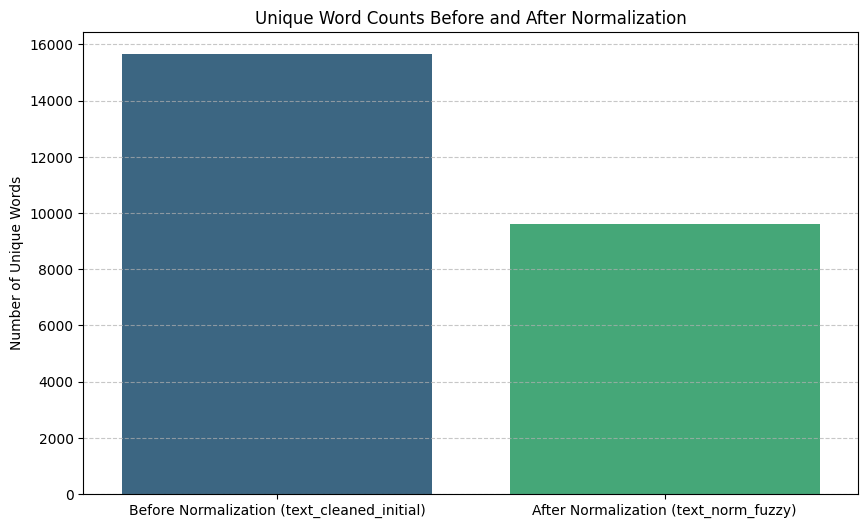

--------------------------------------------------

--- Top 20 Most Frequent Words from Normalized Text (text_norm_fuzzy) ---
barang: 19642
kasih: 18093
dengan: 15767
terima: 14428
sesuai: 12205
cepat: 12114
bagus: 11227
sampai: 6810
susah: 5752
mantap: 5676
pengiriman: 5250
respon: 5147
baik: 4670
oke: 4622
packing: 4049
gan: 3919
produk: 3865
seller: 3840
yang: 3738
tidak: 3572


In [323]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import re

# --- Word frequencies for 'text_cleaned_initial' (Before Normalization) ---
print("\n--- Word Frequencies for 'text_cleaned_initial' (Before Normalization) ---")
all_text_initial = " ".join(df["text_cleaned_initial"].astype(str))
cleaned_text_initial_for_freq = re.sub(r"[^0-9a-zA-ZÀ-ÿ\s]", " ", all_text_initial)
cleaned_text_initial_for_freq = re.sub(r"\s+", " ", cleaned_text_initial_for_freq).strip()
tokens_initial = cleaned_text_initial_for_freq.lower().split()

freq_initial = Counter(tokens_initial)
unique_words_initial = sorted(freq_initial.keys())

print("Total tokens (text_cleaned_initial)        :", len(tokens_initial))
print("Jumlah kata unik (text_cleaned_initial)    :", len(unique_words_initial))
print("10 kata paling sering (text_cleaned_initial)     :", freq_initial.most_common(10))
print("-" * 50)

# --- Word frequencies for 'text_norm_fuzzy' (After Normalization) ---
print("\n--- Word Frequencies for 'text_norm_fuzzy' (After Normalization) ---")
all_text_norm_fuzzy = " ".join(df["text_norm_fuzzy"].astype(str))
cleaned_text_norm_fuzzy_for_freq = re.sub(r"[^0-9a-zA-ZÀ-ÿ\s]", " ", all_text_norm_fuzzy)
cleaned_text_norm_fuzzy_for_freq = re.sub(r"\s+", " ", cleaned_text_norm_fuzzy_for_freq).strip()
tokens_norm_fuzzy = cleaned_text_norm_fuzzy_for_freq.lower().split()

freq_norm_fuzzy = Counter(tokens_norm_fuzzy)
unique_words_norm_fuzzy = sorted(freq_norm_fuzzy.keys())

print("Total tokens (text_norm_fuzzy)        :", len(tokens_norm_fuzzy))
print("Jumlah kata unik (text_norm_fuzzy)    :", len(unique_words_norm_fuzzy))
print("10 kata paling sering (text_norm_fuzzy)     :", freq_norm_fuzzy.most_common(10))
print("-" * 50)

# --- Visualize unique word counts ---
counts = [len(unique_words_initial), len(unique_words_norm_fuzzy)]
labels = ['Before Normalization (text_cleaned_initial)', 'After Normalization (text_norm_fuzzy)']

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=counts, hue=labels, palette='viridis', legend=False)
plt.title('Unique Word Counts Before and After Normalization')
plt.ylabel('Number of Unique Words')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("-" * 50)

# --- Top 20 Most Frequent Words from Normalized Text (text_norm_fuzzy) ---
print("\n--- Top 20 Most Frequent Words from Normalized Text (text_norm_fuzzy) ---")
top_20_norm_fuzzy = freq_norm_fuzzy.most_common(20)
for word, count in top_20_norm_fuzzy:
    print(f"{word}: {count}")

## Opsi Percobaan Lain yang Tidak Dipilih Menjadi Model Akhir

In [324]:
!pip install -q transformers accelerate sentencepiece

import re
from collections import Counter
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline


In [325]:
"""model_id = "indonlp/cendol-mt5-small-inst"

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForSeq2SeqLM.from_pretrained(model_id)

hf_pipe = pipeline(
    "text2text-generation",
    model=model,
    tokenizer=tokenizer,
    device=0
)"""

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/330 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/16.3M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/74.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/808 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.23G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Device set to use cuda:0


In [326]:
"""import re

all_text_raw = " ".join(df["text"].astype(str))
cleaned_raw = re.sub(r"[^0-9a-zA-ZÀ-ÿ\s]", " ", all_text_raw)
words_raw = cleaned_raw.lower().split()
unique_words_raw = sorted(set(words_raw))

print("Jumlah kata unik sebelum normalisasi:", len(unique_words_raw))"""

Jumlah kata unik sebelum normalisasi: 15653


In [327]:
"""ll_text_raw = " ".join(df["text"].astype(str))
cleaned_raw = re.sub(r"[^0-9a-zA-ZÀ-ÿ\s]", " ", all_text_raw)
tokens_raw = cleaned_raw.lower().split()

freq_raw = Counter(tokens_raw)
unique_words_raw = sorted(freq_raw.keys())

print("Total token (kata)        :", len(tokens_raw))
print("Jumlah kata unik (raw)    :", len(unique_words_raw))
print("10 kata paling sering     :", freq_raw.most_common(10))
"""

Total token (kata)        : 329424
Jumlah kata unik (raw)    : 15653
10 kata paling sering     : [('barang', 15762), ('sesuai', 11552), ('cepat', 8911), ('dan', 8125), ('bagus', 7616), ('dengan', 5692), ('sudah', 5676), ('sampai', 4635), ('baik', 4563), ('pengiriman', 4562)]


In [328]:
"""def call_hf_llm_for_batch(token_batch, pipe):
    """
    token_batch: list[str] kata unik
    return: dict {token: normalized_form}
    """

    token_list_str = "\n".join(token_batch)

    prompt = (
        "Tugasmu: normalisasi token-token dari ulasan produk e-commerce bahasa Indonesia.\n"
        "- Jika token slang / singkatan / typo, ubah ke bentuk bahasa Indonesia baku.\n"
        "- Jika token bahasa Inggris umum (good, thankyou, desc, pic, recommend, dll), ubah ke padanan Indonesia.\n"
        "- Jika token sudah baku dan tidak perlu diubah, tulis 'SAME'.\n"
        "- Format jawaban *HARUS* tepat: satu baris per token, dengan format:\n"
        "  token<TAB>bentuk_normalisasi\n"
        "Tanpa penjelasan lain.\n\n"
        "Daftar token:\n"
        f"{token_list_str}\n"
        "\nJawaban:"
    )

    result = pipe(
        prompt,
        max_new_tokens=512,
        do_sample=False,
    )[0]["generated_text"]

    # Buang bagian prompt di depan (kalau masih ikut)
    if prompt in result:
        result = result.split(prompt, 1)[1].strip()

    mapping = {}
    for line in result.splitlines():
        line = line.strip()
        if not line:
            continue

        if "\t" in line:
            tok, norm = line.split("\t", 1)
        elif " " in line:
            # fallback kalau dia pakai spasi
            tok, norm = line.split(" ", 1)
        else:
            continue

        tok = tok.strip()
        norm = norm.strip()

        if not tok or not norm:
            continue

        mapping[tok] = norm

    return mapping"""

In [329]:
"""vocab_sorted = sorted(freq_raw.items(), key=lambda x: x[1], reverse=True)
tokens_sorted = [w for w, c in vocab_sorted]

print("Jumlah kata unik:", len(tokens_sorted))

batch_size = 100
LLM_SLANG_DICT = {}

for i in range(0, len(tokens_sorted), batch_size):
    batch = tokens_sorted[i:i+batch_size]
    print(f"Batch {i//batch_size + 1} | {len(batch)} token | index {i}-{i+len(batch)-1}")

    mapping = call_hf_llm_for_batch(batch, hf_pipe)
    LLM_SLANG_DICT.update(mapping)

print("Total entri di LLM_SLANG_DICT:", len(LLM_SLANG_DICT))

# contoh
for t, n in list(LLM_SLANG_DICT.items())[:40]:
    print(f"{t:20s} -> {n}")
"""

Jumlah kata unik: 15653
Batch 1 | 100 token | index 0-99
Batch 2 | 100 token | index 100-199
Batch 3 | 100 token | index 200-299
Batch 4 | 100 token | index 300-399
Batch 5 | 100 token | index 400-499
Batch 6 | 100 token | index 500-599
Batch 7 | 100 token | index 600-699
Batch 8 | 100 token | index 700-799
Batch 9 | 100 token | index 800-899
Batch 10 | 100 token | index 900-999


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Batch 11 | 100 token | index 1000-1099
Batch 12 | 100 token | index 1100-1199
Batch 13 | 100 token | index 1200-1299
Batch 14 | 100 token | index 1300-1399
Batch 15 | 100 token | index 1400-1499
Batch 16 | 100 token | index 1500-1599
Batch 17 | 100 token | index 1600-1699
Batch 18 | 100 token | index 1700-1799
Batch 19 | 100 token | index 1800-1899
Batch 20 | 100 token | index 1900-1999
Batch 21 | 100 token | index 2000-2099
Batch 22 | 100 token | index 2100-2199
Batch 23 | 100 token | index 2200-2299
Batch 24 | 100 token | index 2300-2399
Batch 25 | 100 token | index 2400-2499
Batch 26 | 100 token | index 2500-2599
Batch 27 | 100 token | index 2600-2699
Batch 28 | 100 token | index 2700-2799
Batch 29 | 100 token | index 2800-2899
Batch 30 | 100 token | index 2900-2999
Batch 31 | 100 token | index 3000-3099
Batch 32 | 100 token | index 3100-3199
Batch 33 | 100 token | index 3200-3299
Batch 34 | 100 token | index 3300-3399
Batch 35 | 100 token | index 3400-3499
Batch 36 | 100 token | in

In [330]:
"""!pip install -q transformers accelerate sentencepiece

import re
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline

model_id = "indonlp/cendol-mt5-small-inst"

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForSeq2SeqLM.from_pretrained(model_id)

hf_pipe = pipeline(
    "text2text-generation",
    model=model,
    tokenizer=tokenizer,
    device=0  # 0 kalau pakai GPU, -1 kalau CPU
)
"""

Device set to use cuda:0


In [333]:
"""def basic_clean(text: str) -> str:
    if not isinstance(text, str):
        return ""
    t = text.lower()
    t = re.sub(r"[^0-9a-zA-ZÀ-ÿ\s]", " ", t)
    t = re.sub(r"\s+", " ", t).strip()
    return t

df["text_clean"] = df["text"].astype(str).apply(basic_clean)"""

In [3]:
'''!pip install editdistance

import editdistance

# misal: lexicon_kata_baku = set([...])  # kumpulan kata baku
# freq_raw = Counter(tokens_raw)

# FIX: Define lexicon_kata_baku from the values of TARGET_NORMAL
lexicon_kata_baku = set(TARGET_NORMAL.values())

def suggest_norm_by_edit(word, lexicon, max_dist=2):
    best = None
    best_dist = max_dist + 1
    for w in lexicon:
        d = editdistance.eval(word, w)
        if d < best_dist:
            best_dist = d
            best = w
    return best  # None kalau ga ada yang cukup dekat

noisy_candidates = [w for w, c in freq_raw.items()
                    if c >= 3 and w not in lexicon_kata_baku]

norm_by_edit = {}
for w in noisy_candidates:
    cand = suggest_norm_by_edit(w, lexicon_kata_baku, max_dist=2)
    if cand is not None:
        norm_by_edit[w] = cand

print("Jumlah kata yang dinormalisasi via edit-distance:", len(norm_by_edit))
list(norm_by_edit.items())[:50]"""'''

'!pip install editdistance\n\nimport editdistance\n\n# misal: lexicon_kata_baku = set([...])  # kumpulan kata baku\n# freq_raw = Counter(tokens_raw)\n\n# FIX: Define lexicon_kata_baku from the values of TARGET_NORMAL\nlexicon_kata_baku = set(TARGET_NORMAL.values())\n\ndef suggest_norm_by_edit(word, lexicon, max_dist=2):\n    best = None\n    best_dist = max_dist + 1\n    for w in lexicon:\n        d = editdistance.eval(word, w)\n        if d < best_dist:\n            best_dist = d\n            best = w\n    return best  # None kalau ga ada yang cukup dekat\n\nnoisy_candidates = [w for w, c in freq_raw.items()\n                    if c >= 3 and w not in lexicon_kata_baku]\n\nnorm_by_edit = {}\nfor w in noisy_candidates:\n    cand = suggest_norm_by_edit(w, lexicon_kata_baku, max_dist=2)\n    if cand is not None:\n        norm_by_edit[w] = cand\n\nprint("Jumlah kata yang dinormalisasi via edit-distance:", len(norm_by_edit))\nlist(norm_by_edit.items())[:50]"""'

In [335]:
!pip install gensim


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 26.6 MB/s eta 0:00:00


In [1]:
"""EXTRA_RULES = {
    "dgn": "dengan",
    "dg": "dengan",

    "thankyou": "terima kasih",
    "thanks": "terima kasih",
    "thank": "terima kasih",
    "thx": "terima kasih",
    "tks": "terima kasih",
    "tq": "terima kasih",
    "mksh": "terima kasih",
    "makasih": "terima kasih",
    "trimakasih": "terima kasih",
    "trims": "terima kasih",
    "trim": "terima kasih",

    "desc": "deskripsi",
    "dsc": "deskripsi",
    "dscrb": "deskripsi",
    "dscrbs": "deskripsi",

    "pic": "gambar",
    "pics": "gambar",
    "pict": "gambar",
    "picture": "gambar",
    "photo": "foto",

    "good": "bagus",
    "nice": "bagus",
    "best": "terbaik",

    "recommend": "direkomendasikan",
    "recommended": "direkomendasikan",
    "recomended": "direkomendasikan",
    "recomend": "direkomendasikan",
    "rekomen": "direkomendasikan",
    "rekomend": "direkomendasikan",
    "rekomended": "direkomendasikan",
}

FINAL_DICT = dict(clean_llm_dict)
FINAL_DICT.update(EXTRA_RULES)

print("Total entri FINAL_DICT:", len(FINAL_DICT))
for key in ["dgn","thankyou","thanks","thx","tks","desc","dsc","pic","good","recommend","recommended"]:
    if key in FINAL_DICT:
        print(f"{key:15s} -> {FINAL_DICT[key]}")
"""

'EXTRA_RULES = {\n    "dgn": "dengan",\n    "dg": "dengan",\n\n    "thankyou": "terima kasih",\n    "thanks": "terima kasih",\n    "thank": "terima kasih",\n    "thx": "terima kasih",\n    "tks": "terima kasih",\n    "tq": "terima kasih",\n    "mksh": "terima kasih",\n    "makasih": "terima kasih",\n    "trimakasih": "terima kasih",\n    "trims": "terima kasih",\n    "trim": "terima kasih",\n\n    "desc": "deskripsi",\n    "dsc": "deskripsi",\n    "dscrb": "deskripsi",\n    "dscrbs": "deskripsi",\n\n    "pic": "gambar",\n    "pics": "gambar",\n    "pict": "gambar",\n    "picture": "gambar",\n    "photo": "foto",\n\n    "good": "bagus",\n    "nice": "bagus",\n    "best": "terbaik",\n\n    "recommend": "direkomendasikan",\n    "recommended": "direkomendasikan",\n    "recomended": "direkomendasikan",\n    "recomend": "direkomendasikan",\n    "rekomen": "direkomendasikan",\n    "rekomend": "direkomendasikan",\n    "rekomended": "direkomendasikan",\n}\n\nFINAL_DICT = dict(clean_llm_dict)\nF

In [ ]:
"""from collections import Counter

all_text_raw = " ".join(df["text"].astype(str))
cleaned_raw = re.sub(r"[^0-9a-zA-ZÀ-ÿ\s]", " ", all_text_raw)
words_raw = cleaned_raw.lower().split()

freq_raw = Counter(words_raw)
unique_words_raw = sorted(freq_raw)

print("=== STEP 1: RAW TEXT ===")
print("Jumlah token (kata) total   :", len(words_raw))
print("Jumlah kata unik (raw)      :", len(unique_words_raw))
print("Contoh 30 kata unik pertama :", unique_words_raw[:100])"""

In [ ]:
"""!pip install gensim

!wget -q https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.bin.gz -O /content/cc.id.300.bin.gz
!gunzip -f /content/cc.id.300.bin.gz
"""

In [ ]:
"""import re
from collections import Counter

def basic_clean(text: str) -> str:
    if not isinstance(text, str):
        return ""
    t = text.lower()
    t = re.sub(r"[^0-9a-zA-ZÀ-ÿ\s]", " ", t)
    t = re.sub(r"\s+", " ", t).strip()
    return t

df["text_clean"] = df["text"].astype(str).apply(basic_clean)

all_text_clean = " ".join(df["text_clean"].astype(str))
tokens_clean = all_text_clean.split()

freq_raw = Counter(tokens_clean)
unique_words_raw = sorted(freq_raw.keys())

print("Total token (clean)      :", len(tokens_clean))
print("Jumlah kata unik (clean):", len(unique_words_raw))
print("10 kata paling sering   :", freq_raw.most_common(10))
"""

In [ ]:
"""
from gensim.models import Word2Vec

sentences = [row.split() for row in df["text_clean"].astype(str)]

w2v_model = Word2Vec(
    sentences,
    vector_size=100,
    window=5,
    min_count=3,
    workers=4,
    sg=1

kv = w2v_model.wv  # KeyedVectors
print("Jumlah vocab di embedding:", len(kv))
print("Contoh nearest neighbors 'bagus':", kv.most_similar("bagus", topn=5))
"""

In [ ]:
"""lexicon_kata_baku = set()

for w, c in freq_raw.items():
    if c < 5:
        continue
    if any(ch.isdigit() for ch in w):
        continue
    if len(w) < 3:
        continue
    if any(sub in w for sub in ["wkw", "gk", "ga", "gak", "bgt", "bgd", "mksh", "tq", "thx"]):
        continue
    lexicon_kata_baku.add(w)

for v in TARGET_NORMAL.values():
    for t in v.split():
        lexicon_kata_baku.add(t)

print("Jumlah lexicon_kata_baku:", len(lexicon_kata_baku))
print("Contoh lexicon:", list(sorted(lexicon_kata_baku))[:50])

noisy_candidates = []

for w, c in freq_raw.items():
    if c < 3:
        continue
    if any(ch.isdigit() for ch in w):
        continue
    if len(w) < 2:
        continue
    if w in lexicon_kata_baku:
        continue
    noisy_candidates.append(w)

noisy_candidates = sorted(noisy_candidates, key=lambda x: -freq_raw[x])

print("Jumlah noisy_candidates:", len(noisy_candidates))
print("Contoh 50 noisy_candidates:", noisy_candidates[:50])
"""

In [ ]:
"""def suggest_by_embedding(word, kv, lexicon, topn=30, min_sim=0.6):
    try:
        sims = kv.most_similar(word, topn=topn)
    except KeyError:
        return None, None

    for cand, score in sims:
        if cand in lexicon and score >= min_sim:
            return cand, score
    return None, None

embed_norm_dict = {}

for w in noisy_candidates:
    cand, score = suggest_by_embedding(w, kv, lexicon_kata_baku, topn=30, min_sim=0.7)
    if cand is not None:
        embed_norm_dict[w] = (cand, score)

print("=== EMBEDDING NORMALIZATION ===")
print("Jumlah kata dapat mapping via embedding:", len(embed_norm_dict))

for w, (cand, score) in list(embed_norm_dict.items()):
    print(f"{w:20s} -> {cand:20s}  (sim={score:.3f})")
"""

In [337]:
"""# gabung semua teks
all_text_raw = " ".join(df["text"].astype(str))

# buang simbol non huruf/angka
cleaned_raw = re.sub(r"[^0-9a-zA-ZÀ-ÿ\s]", " ", all_text_raw)
tokens_raw = cleaned_raw.lower().split()

freq_raw = Counter(tokens_raw)
unique_words_raw = sorted(freq_raw.keys())

print("=== STEP 1: VOCAB DATASET ===")
print("Total token        :", len(tokens_raw))
print("Jumlah kata unik   :", len(unique_words_raw))
print("10 kata paling sering:", freq_raw.most_common(10))
"""

=== STEP 1: VOCAB DATASET ===
Total token        : 329424
Jumlah kata unik   : 15653
10 kata paling sering: [('barang', 15762), ('sesuai', 11552), ('cepat', 8911), ('dan', 8125), ('bagus', 7616), ('dengan', 5692), ('sudah', 5676), ('sampai', 4635), ('baik', 4563), ('pengiriman', 4562)]


In [338]:
"""!pip install gensim

# download fastText Indo dari official repo
!wget -q https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.bin.gz -O /content/cc.id.300.bin.gz
!gunzip -f /content/cc.id.300.bin.gz
"""

In [ ]:
"""import gensim

fasttext_path = "/content/cc.id.300.bin"
ft = gensim.models.fasttext.load_facebook_vectors(fasttext_path)

print("Dimensi embedding:", ft.vector_size)
print("Contoh vektor 'barang':", ft["barang"][:10])
"""

In [ ]:
"""# --- 1. FUZZY MATCHING & KAMUS SLANG ---

from difflib import get_close_matches

base_slang_for_fuzzy = sorted({
    w for w in CORE_BASE_SLANG if " " not in w
} | {
    k for k in TARGET_NORMAL.keys() if " " not in k
})

print("\n=== STEP 3: BASE UNTUK FUZZY ===")
print("Jumlah base_slang_for_fuzzy:", len(base_slang_for_fuzzy))
print("Contoh 30 base:", base_slang_for_fuzzy[:30])

generated_slang = {}

for base in base_slang_for_fuzzy:
    matches = get_close_matches(base, unique_words_raw, n=80, cutoff=0.7)
    if matches:
        generated_slang[base] = matches

total_variants = sum(len(v) for v in generated_slang.values())

print("\n=== STEP 3: HASIL FUZZY MATCH ===")
print("Jumlah base yang punya match :", len(generated_slang))
print("Jumlah varian slang total    :", total_variants)
print("Jumlah kata unik (raw)       :", len(unique_words_raw))

auto_slang_dict = {}

for base, variants in generated_slang.items():
    base_target = TARGET_NORMAL.get(base, base)
    for v in variants:
        target = TARGET_NORMAL.get(v, base_target)
        auto_slang_dict[v] = target

print("\n=== STEP 4: MAPPING VARIAN → NORMAL ===")
print("Jumlah varian slang yg punya mapping:", len(auto_slang_dict))
print("Jumlah kata unik (raw)               :", len(unique_words_raw))
"""

In [ ]:
"""# --- 2. FUNGSI NORMALISASI & PENERAPAN KE DATAFRAME ---

def reduce_lengthening(word: str) -> str:
    return re.sub(r"(.)\1{2,}", r"\1\1", word)

def basic_clean(text: str) -> str:
    if not isinstance(text, str):
        return ""
    t = text.lower()
    t = re.sub(r"[^0-9a-zA-ZÀ-ÿ\s]", " ", t)
    t = re.sub(r"\s+", " ", t).strip()
    return t

def apply_slang_normalization(text: str) -> str:
    tokens = []
    for w in text.split():
        w_reduced = reduce_lengthening(w)
        if w_reduced in auto_slang_dict:      # <<< PAKAI kamus hasil fuzzy
            tokens.extend(auto_slang_dict[w_reduced].split())
        else:
            tokens.append(w_reduced)
    return " ".join(tokens)

# dipakai di df
df["text_clean"] = df["text"].astype(str).apply(basic_clean)
df["text_norm"]  = df["text_clean"].apply(apply_slang_normalization)
"""

In [ ]:
"""def count_unique_words(series):
    all_text = " ".join(series.astype(str))
    clean = re.sub(r"[^0-9a-zA-ZÀ-ÿ\s]", " ", all_text)
    words = clean.lower().split()
    return len(set(words))

uniq_raw   = len(unique_words_raw)
uniq_clean = count_unique_words(df["text_clean"])
uniq_norm  = count_unique_words(df["text_norm"])

print("\n=== STEP 5: JUMLAH KATA UNIK DI TIAP TAHAP ===")
print("Raw (df['text'])        :", uniq_raw)
print("Setelah basic_clean     :", uniq_clean)
print("Setelah slang normalize :", uniq_norm)
"""

In [ ]:
"""from difflib import get_close_matches

base_slang_for_fuzzy = sorted({
    w for w in CORE_BASE_SLANG if " " not in w
} | {
    k for k in TARGET_NORMAL.keys() if " " not in k
})

print("\n=== STEP 3: BASE UNTUK FUZZY ===")
print("Jumlah base_slang_for_fuzzy:", len(base_slang_for_fuzzy))
print("Contoh 30 base:", base_slang_for_fuzzy[:30])

generated_slang = {}

for base in base_slang_for_fuzzy:
    matches = get_close_matches(base, unique_words_raw, n=80, cutoff=0.7)
    if matches:
        generated_slang[base] = matches

total_variants = sum(len(v) for v in generated_slang.values())

print("\n=== STEP 3: HASIL FUZZY MATCH ===")
print("Jumlah base yang punya match :", len(generated_slang))
print("Jumlah varian slang total    :", total_variants)
print("Jumlah kata unik (raw)       :", len(unique_words_raw))

for b, vs in list(generated_slang.items()):
    print(f"\nBase: {b}")
    print("Varian:", vs[:20])"""

In [ ]:
"""auto_slang_dict = {}

for base, variants in generated_slang.items():
    base_target = TARGET_NORMAL.get(base, base)
    for v in variants:
        target = TARGET_NORMAL.get(v, base_target)
        auto_slang_dict[v] = target

print("\n=== STEP 4: MAPPING VARIAN → NORMAL ===")
print("Jumlah varian slang yg punya mapping:", len(auto_slang_dict))
print("Jumlah kata unik (raw)               :", len(unique_words_raw))

print("\nContoh 50 mapping slang → normal:")
for slang, normal in list(sorted(auto_slang_dict.items()))[:50]:
    print(f"{slang:20s} -> {normal}")

print("\nVARIAN yang dinormalisasi jadi 'tidak':")
for slang, normal in sorted(auto_slang_dict.items()):
    if normal == "tidak":
        print(f"{slang:20s} -> {normal}")

print("\nVARIAN yang dinormalisasi jadi 'oke':")
for slang, normal in sorted(auto_slang_dict.items()):
    if normal == "oke":
        print(f"{slang:20s} -> {normal}")"""

In [ ]:
"""def reduce_lengthening(word: str) -> str:
    return re.sub(r"(.)\1{2,}", r"\1\1", word)

def basic_clean(text: str) -> str:
    if not isinstance(text, str):
        return ""
    t = text.lower()
    t = re.sub(r"[^0-9a-zA-ZÀ-ÿ\s]", " ", t)
    t = re.sub(r"\s+", " ", t).strip()
    return t

def apply_slang_normalization(text: str) -> str:
    tokens = []
    for w in text.split():
        w_reduced = reduce_lengthening(w)
        if w_reduced in auto_slang_dict:
            tokens.extend(auto_slang_dict[w_reduced].split())
        else:
            tokens.append(w_reduced)
    return " ".join(tokens)

df["text_clean"] = df["text"].astype(str).apply(basic_clean)
df["text_norm"]  = df["text_clean"].apply(apply_slang_normalization)

def count_unique_words(series):
    all_text = " ".join(series.astype(str))
    clean = re.sub(r"[^0-9a-zA-ZÀ-ÿ\s]", " ", all_text)
    words = clean.lower().split()
    return len(set(words))


uniq_raw   = len(unique_words_raw)
uniq_clean = count_unique_words(df["text_clean"])
uniq_norm  = count_unique_words(df["text_norm"])

print("\n=== STEP 5: JUMLAH KATA UNIK DI TIAP TAHAP ===")
print("Raw (df['text'])        :", uniq_raw)
print("Setelah basic_clean     :", uniq_clean)
print("Setelah slang normalize :", uniq_norm)"""

In [ ]:
"""pattern_slang = r"\b(" + "|".join(map(re.escape, auto_slang_dict.keys())) + r")\b"

sample = df[df["text_clean"].str.lower().str.contains(pattern_slang, na=False)].copy()

print("\nJumlah baris yang mengandung slang-varian:", len(sample))

print("\n=== CONTOH BEFORE/AFTER ===")
for i, row in sample[["text", "text_norm"]].head(200).iterrows():
    print("-" * 1000)
    print("RAW  :", row["text"])
    print("NORM :", row["text_norm"])"""

In [ ]:
"""all_text = " ".join(df["text_norm"].astype(str))
clean = re.sub(r"[^0-9a-zA-ZÀ-ÿ\s]", " ", all_text)
words = clean.lower().split()

unique_words_now = sorted(set(words))

print("Jumlah kata unik:", len(unique_words_now))
print("=== Semua kata unik ===")
for w in unique_words_now:
    print(w)
"""

In [ ]:
"""import re
from collections import Counter
import pandas as pd

print("Jumlah baris dataset:", len(df))
print(df["text"].head())
"""

In [ ]:
"""all_text_raw = " ".join(df["text"].astype(str))

cleaned_raw = re.sub(r"[^0-9a-zA-ZÀ-ÿ\s]", " ", all_text_raw)

tokens_raw = cleaned_raw.lower().split()

freq_raw = Counter(tokens_raw)
unique_words_raw = sorted(freq_raw.keys())

print("=== STEP 1: VOCAB AWAL (RAW) ===")
print("Total token (kata)        :", len(tokens_raw))
print("Jumlah kata unik (raw)    :", len(unique_words_raw))
print("10 kata paling sering     :", freq_raw.most_common(10))
print("Contoh 30 kata unik awal  :", unique_words_raw[:30])
"""